<a href="https://colab.research.google.com/github/JotaBlanco/AnalyticsExample/blob/main/3d_printer_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import pandas as pd
import numpy as np
import random
import time

# 3D Printer data
             1. Layer Height in mm
             2. Wall Thickness in mm
             3. Infill Density in %
             4. Infill Pattern in either Grid or Honeycomb
             5. Nozzle Temperature in Degree C
             6. Bed Temperature in degree C
             7. Print speed in mm/s
             8. Material in either abs or pla
             9. Fan Speed in %

            1. Roughness in micro metre
             2. Tension Strength in MPa
             3. Elongation in %

In [55]:
df = pd.read_csv("https://raw.githubusercontent.com/JotaBlanco/AnalyticsExample/refs/heads/main/3D_printer_material_data.csv")
df

layer_height  wall_thickness  infill_density infill_pattern  \
0           0.02             8.0              90           grid   
1           0.02             7.0              90      honeycomb   
2           0.02             1.0              80           grid   
3           0.02             4.0              70      honeycomb   
4           0.02             6.0              90           grid   
..           ...             ...             ...            ...   
61          0.06             9.0              10      honeycomb   
62          0.04             2.0              80           grid   
63          0.02             4.5              70      honeycomb   
64          0.05             6.0              10      honeycomb   
65          0.15             1.0              50           grid   

    nozzle_temperature  bed_temperature  print_speed material  fan_speed  \
0                  220               60           40      abs          0   
1                  225               65           40      abs         25   
2                  230               70           40      abs         50   
3                  240               75           40      abs         75   
4                  250               80           40      abs        100   
..                 ...              ...          ...      ...        ...   
61                 200               75           80      abs         75   
62                 230               70           40      abs         50   
63                 240               85           40      abs         75   
64                 245               75           85      abs         75   
65                 220               60          120      abs          0   

    roughness  tension_strenght  elongation  
0          25                18         1.2  
1          32                16         1.4  
2          40                 8         0.8  
3          68                10         0.5  
4          92                 5         0.7  
..        ...               ...         ...  
61        200                 9         0.9  
62         40                12         0.8  
63         68                10         0.8  
64        205                 5         0.5  
65        120                16         1.5  

[66 rows x 12 columns]

In [56]:
df["material"].value_counts()

material
abs    36
pla    30
Name: count, dtype: int64

# 01 - First EDA

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   layer_height        66 non-null     float64
 1   wall_thickness      66 non-null     float64
 2   infill_density      66 non-null     int64  
 3   infill_pattern      66 non-null     object 
 4   nozzle_temperature  66 non-null     int64  
 5   bed_temperature     66 non-null     int64  
 6   print_speed         66 non-null     int64  
 7   material            66 non-null     object 
 8   fan_speed           66 non-null     int64  
 9   roughness           66 non-null     int64  
 10  tension_strenght    66 non-null     int64  
 11  elongation          66 non-null     float64
dtypes: float64(3), int64(7), object(2)
memory usage: 6.3+ KB


In [58]:
df.describe()

layer_height  wall_thickness  infill_density  nozzle_temperature  \
count     66.000000       66.000000       66.000000           66.000000   
mean       0.098182        5.583333       54.727273          222.272727   
std        0.062608        2.952943       27.545512           15.094110   
min        0.020000        1.000000       10.000000          200.000000   
25%        0.052500        3.000000       40.000000          210.000000   
50%        0.100000        6.000000       50.000000          220.000000   
75%        0.150000        8.000000       80.000000          230.000000   
max        0.200000       12.000000      100.000000          250.000000   

       bed_temperature  print_speed   fan_speed   roughness  tension_strenght  \
count        66.000000    66.000000   66.000000   66.000000         66.000000   
mean         70.378788    64.242424   48.530303  160.545455         19.757576   
std           8.651839    28.598580   35.834328   95.703899          9.202108   
min          60.000000    40.000000    0.000000   21.000000          4.000000   
25%          65.000000    40.000000   25.000000   78.250000         12.000000   
50%          70.000000    60.000000   50.000000  149.500000         18.500000   
75%          75.000000    60.000000   75.000000  220.000000         27.000000   
max         100.000000   120.000000  100.000000  368.000000         38.000000   

       elongation  
count   66.000000  
mean     1.625000  
std      0.762498  
min      0.400000  
25%      1.025000  
50%      1.500000  
75%      2.175000  
max      3.300000

In [59]:
for col in ["infill_pattern", "material"]:
  print(col, df[col].nunique())
  display(df[col].value_counts())
  print()

infill_pattern 2


infill_pattern
honeycomb    34
grid         32
Name: count, dtype: int64


material 2


material
abs    36
pla    30
Name: count, dtype: int64

In [60]:
for col in df.columns:
  print(col, df[col].nunique())
  display(df[col].value_counts())
  print()

layer_height 9


layer_height
0.15    14
0.02    13
0.06    13
0.10    11
0.20    10
0.03     2
0.09     1
0.04     1
0.05     1
Name: count, dtype: int64


wall_thickness 12


wall_thickness
6.0     10
4.0      8
10.0     8
3.0      8
1.0      7
7.0      6
8.0      6
9.0      4
2.0      4
5.0      3
12.0     1
4.5      1
Name: count, dtype: int64


infill_density 13


infill_density
50     13
90     10
80      9
10      8
40      7
60      5
30      4
70      3
20      3
100     1
12      1
95      1
85      1
Name: count, dtype: int64


infill_pattern 2


infill_pattern
honeycomb    34
grid         32
Name: count, dtype: int64


nozzle_temperature 10


nozzle_temperature
220    14
230     8
200     7
250     7
225     6
240     6
210     6
205     6
215     5
245     1
Name: count, dtype: int64


bed_temperature 8


bed_temperature
60     15
70     13
75     13
65     12
80     10
100     1
95      1
85      1
Name: count, dtype: int64


print_speed 7


print_speed
40     25
60     25
120    12
70      1
65      1
80      1
85      1
Name: count, dtype: int64


material 2


material
abs    36
pla    30
Name: count, dtype: int64


fan_speed 6


fan_speed
0      15
75     14
50     13
100    12
25     11
28      1
Name: count, dtype: int64


roughness 46


roughness
92     3
25     2
68     2
40     2
220    2
98     2
200    2
75     2
168    2
312    2
120    2
265    2
74     2
126    2
192    2
55     2
212    2
154    2
225    2
60     1
32     1
30     1
118    1
21     1
24     1
144    1
128    1
88     1
145    1
368    1
138    1
180    1
176    1
326    1
172    1
163    1
276    1
289    1
298    1
360    1
321    1
357    1
278    1
244    1
121    1
205    1
Name: count, dtype: int64


tension_strenght 27


tension_strenght
12    6
27    5
18    5
10    4
16    4
19    4
14    3
26    3
29    3
9     3
5     3
28    3
37    2
24    2
8     2
33    2
34    2
25    1
23    1
11    1
38    1
22    1
13    1
4     1
35    1
21    1
30    1
Name: count, dtype: int64


elongation 28


elongation
0.80    6
1.80    6
1.40    5
1.20    4
2.20    4
1.60    4
1.50    3
0.70    3
2.40    3
1.10    3
1.30    2
0.50    2
3.10    2
3.20    2
2.10    2
0.90    2
2.80    2
1.00    1
0.95    1
1.70    1
2.90    1
0.40    1
1.90    1
2.00    1
2.30    1
0.60    1
3.30    1
2.70    1
Name: count, dtype: int64

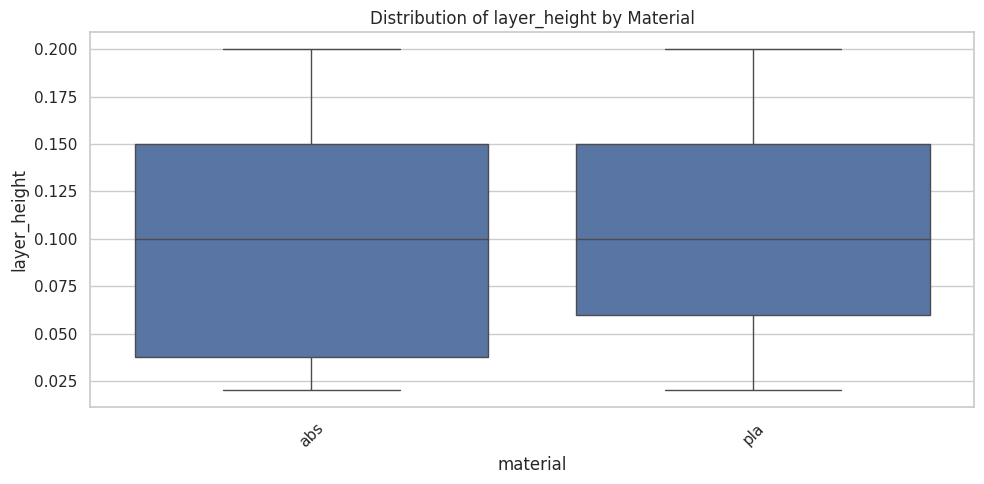

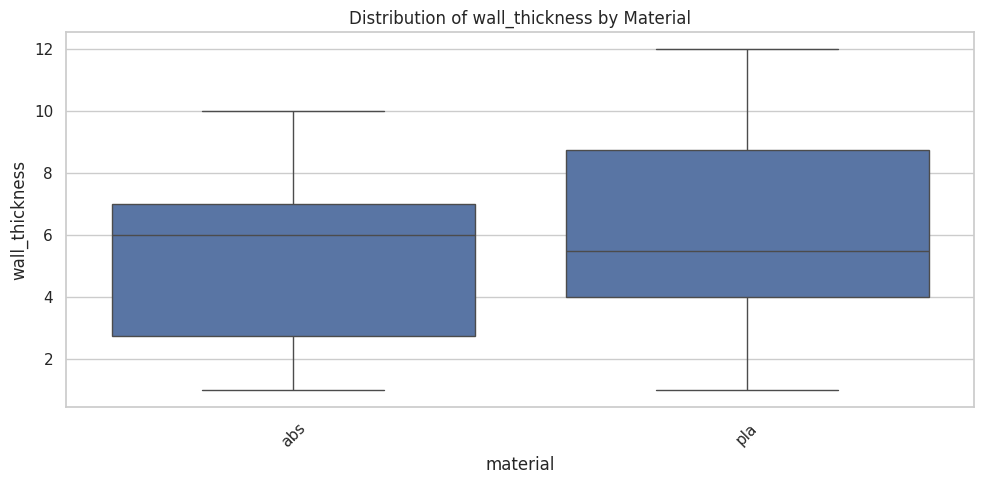

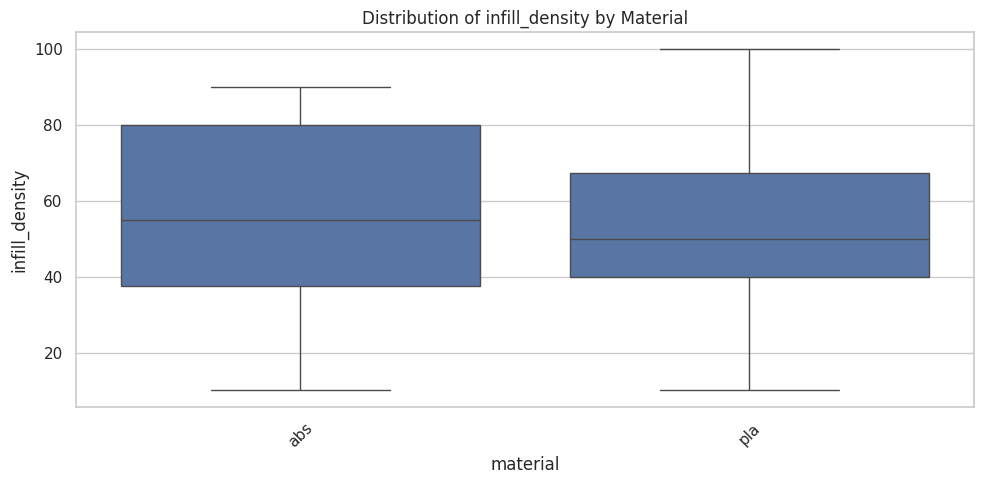

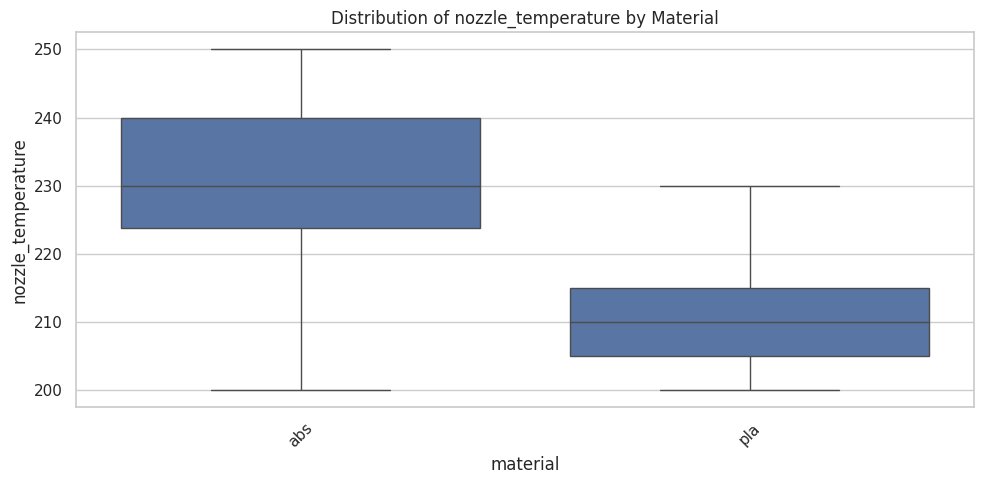

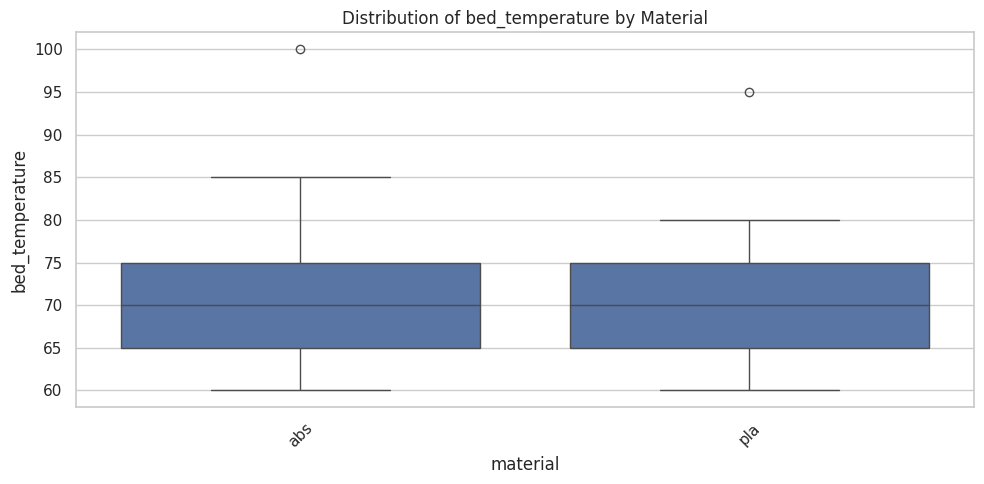

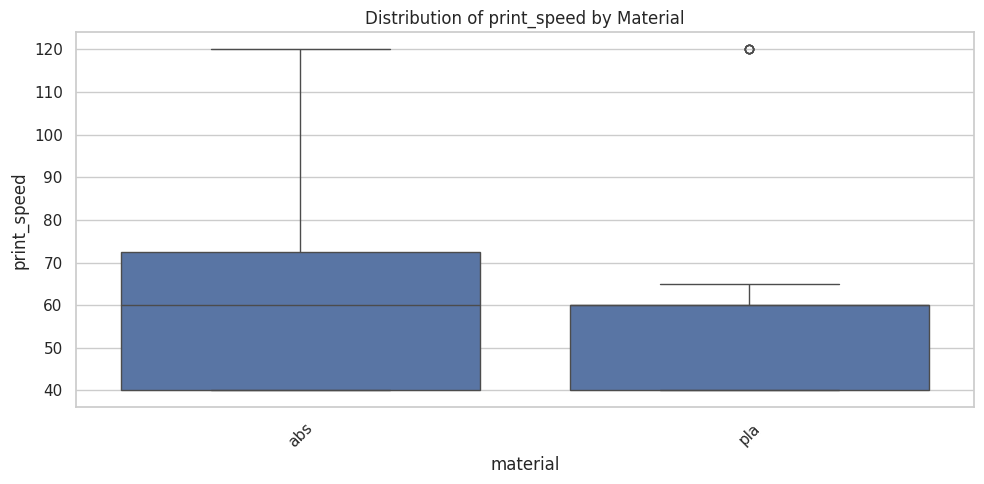

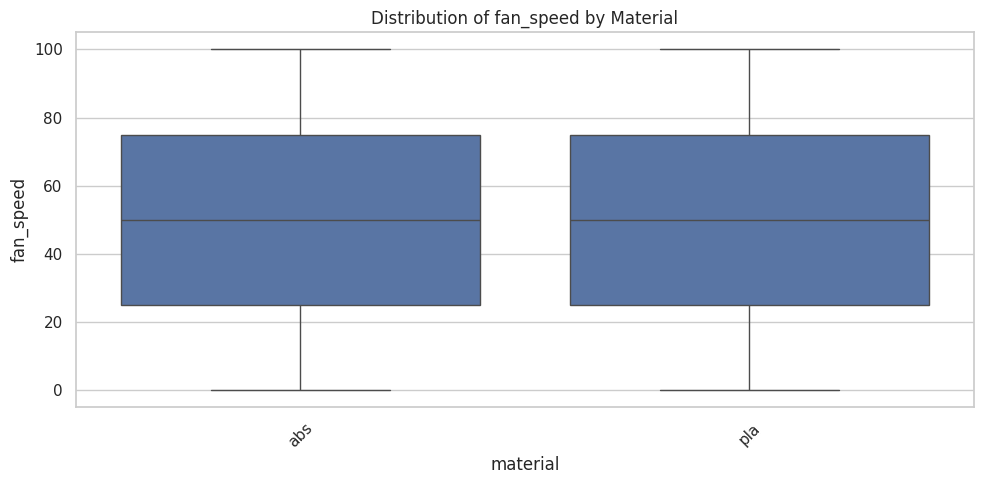

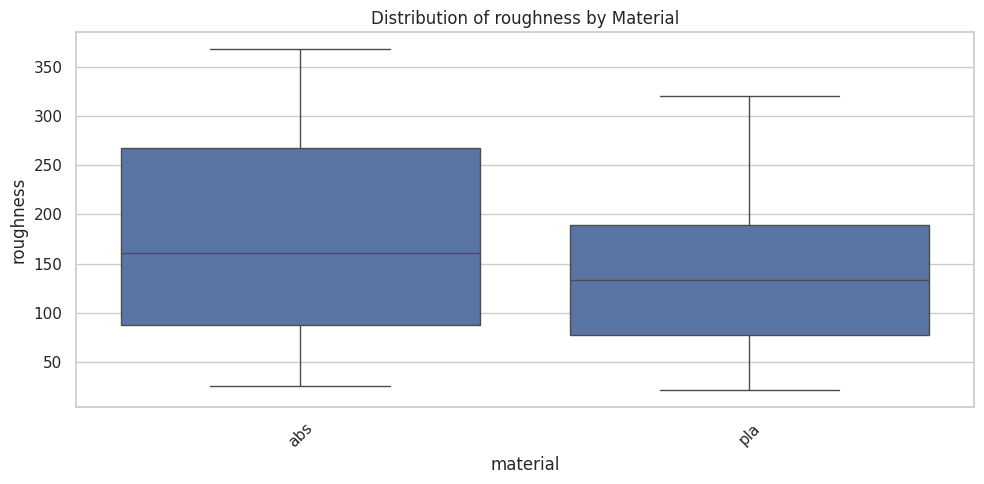

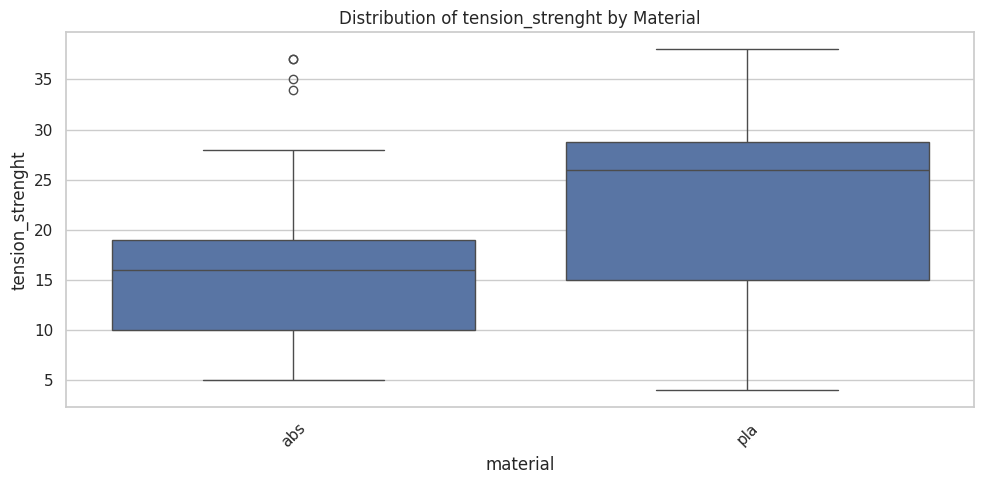

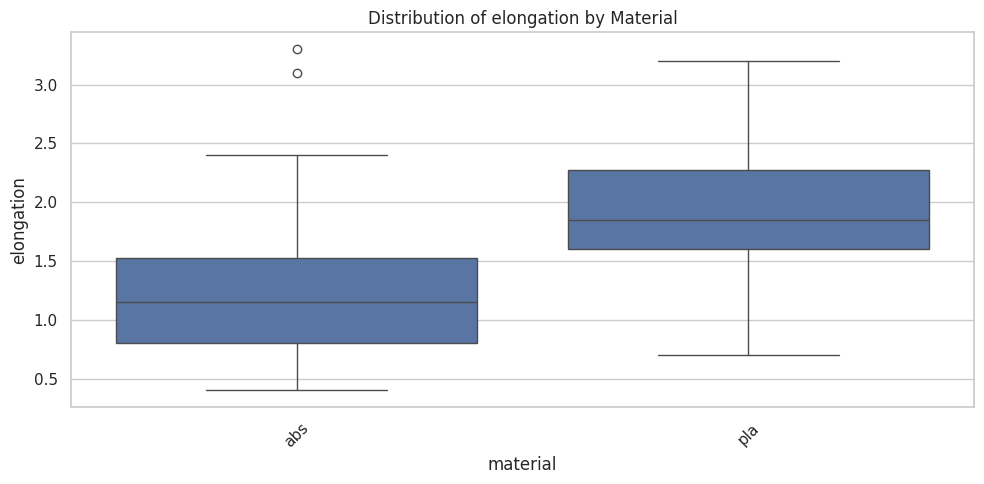

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your DataFrame
sns.set(style="whitegrid")

# Select only numeric columns
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns

# Plot each numeric column grouped by material
for col in numeric_cols:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=df, x="material", y=col)
    plt.title(f'Distribution of {col} by Material')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# 02 - Data generation

In [62]:
import numpy as np
import pandas as pd
from scipy.stats import norm
from sklearn.linear_model import LinearRegression



def generate_elastic_frequency_sine(n_points, base_mu, std, amplitude,
                                    base_freq, freq_mod_amp, freq_mod_freq, phase=0):
    t = np.arange(n_points)

    # Frequency modulation over time (instantaneous frequency)
    inst_freq = base_freq + freq_mod_amp * np.sin(2 * np.pi * freq_mod_freq * t / n_points)

    # Integrate instantaneous frequency to get phase
    inst_phase = 2 * np.pi * np.cumsum(inst_freq) / n_points + phase

    # Sinusoidal mean with elastic frequency
    mu_t = base_mu + amplitude * np.sin(inst_phase)

    # Generate noisy data around the time-varying mean
    data = np.random.normal(mu_t, std)

    return data, mu_t, inst_freq



def train_and_predict_with_noise_on_new(X_train, y_train, X_new, col_name):
    # Fit linear regressor
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict on training set to get residuals
    y_train_pred = model.predict(X_train)
    residuals = y_train - y_train_pred

    # Fit normal distribution to residuals
    mu, std = norm.fit(residuals)
    mu = max(mu, 0.1*y_train_pred.mean())
    std = max(std, 0.001)

    # Predict on new data
    y_pred = model.predict(X_new)

    # Add noise
    y_pred_noisy = y_pred + np.random.normal(mu, std, size=len(y_pred))

    # Soften it up a bit
    if "temperature" in col_name.lower():
      num_points=15
    elif "speed" in col_name.lower():
      num_points=50
    else:
      num_points=5
    y_pred_noisy_softened = np.convolve(y_pred_noisy, np.ones(num_points)/num_points, mode='same')

    return y_pred_noisy_softened


def expand_df_to_n_rows(df, n):
    """Repeat df until it has exactly n rows."""
    if len(df) == 0:
        raise ValueError("Input DataFrame is empty.")
    repeats = n // len(df)
    remainder = n % len(df)
    expanded = pd.concat(
        [df] * repeats + [df.iloc[:remainder]],
        ignore_index=True
    )
    return expanded



def gen_dataset(size, df):
  cat_vars = ["material", "infill_pattern", "layer_height", "wall_thickness", "infill_density"]

  # Generate random single sample
  df_sim = df.sample(1)[cat_vars].merge(df[cat_vars], how="left", on=cat_vars)

  # Parameters
  material_filter = df["material"]==df_sim["material"].iloc[0]
  mean_material = df.loc[material_filter, "nozzle_temperature"].mean()
  std_material = df.loc[material_filter, "nozzle_temperature"].std()
  n = size
  base_mu = norm.rvs(loc=mean_material, scale=std_material*0.25)
  std = std_material/2
  amplitude = base_mu*max(0.01, norm.rvs(loc=0.05, scale=0.025))
  base_freq = norm.rvs(loc=n/50, scale=amplitude*3)
  freq_mod_amp = norm.rvs(loc=n/300, scale=n/30)
  freq_mod_freq = n/300

  # Generate nozzle_temp data
  data, mu_t, inst_freq = generate_elastic_frequency_sine(
      n, base_mu, std, amplitude, base_freq, freq_mod_amp, freq_mod_freq)

  # populate df_sim with nozzle temp
  df_sim = expand_df_to_n_rows(df_sim, n)
  df_sim["nozzle_temperature"] = data

  # populate with rest of columns
  pred_cols = ['nozzle_temperature']
  for col in ['print_speed', 'bed_temperature', 'fan_speed']:
    X = df[pred_cols]
    y = df[col]
    X_new = df_sim[pred_cols]
    df_sim[col] = train_and_predict_with_noise_on_new(X, y, X_new, col)

  # set up limits
  for col in ['print_speed', 'fan_speed']:
    df_sim[col] = df_sim[col].clip(lower=df[col].min(), upper=df[col].max())
  for col in ['nozzle_temperature', 'bed_temperature']:
    df_sim[col] = df_sim[col].clip(lower=df.loc[material_filter,col].min())

  return df_sim

In [63]:
size = random.randint(500, 5000)
print(size)
df_sim = gen_dataset(size, df)
df_sim

1225


material infill_pattern  layer_height  wall_thickness  infill_density  \
0         abs      honeycomb          0.03            10.0              20   
1         abs      honeycomb          0.03            10.0              20   
2         abs      honeycomb          0.03            10.0              20   
3         abs      honeycomb          0.03            10.0              20   
4         abs      honeycomb          0.03            10.0              20   
...       ...            ...           ...             ...             ...   
1220      abs      honeycomb          0.03            10.0              20   
1221      abs      honeycomb          0.03            10.0              20   
1222      abs      honeycomb          0.03            10.0              20   
1223      abs      honeycomb          0.03            10.0              20   
1224      abs      honeycomb          0.03            10.0              20   

      nozzle_temperature  print_speed  bed_temperature  fan_speed  
0             236.802845    40.000000        60.000000  34.049204  
1             220.025954    40.000000        60.000000  34.570227  
2             222.913770    40.000000        60.000000  36.779862  
3             230.605811    40.000000        60.016327  38.152843  
4             228.103365    41.292287        65.472872  38.683979  
...                  ...          ...              ...        ...  
1220          220.127752    50.044057        62.508287  42.258314  
1221          237.641171    48.187856        60.000000  40.436009  
1222          236.837089    45.977179        60.000000  38.784237  
1223          228.517218    43.965049        60.000000  36.843169  
1224          225.334828    42.801609        60.000000  34.038175  

[1225 rows x 9 columns]

3721


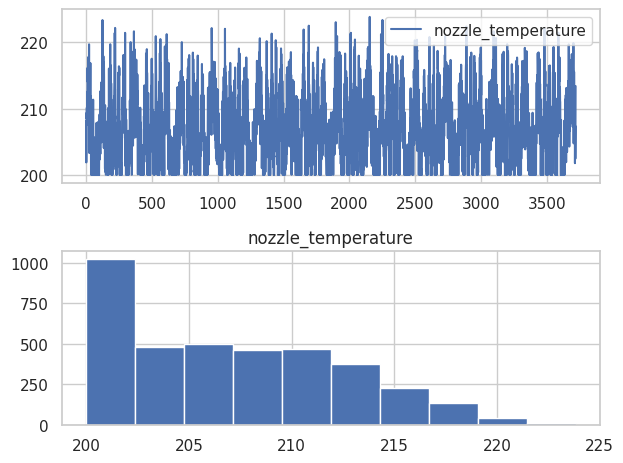

In [64]:
size = random.randint(500, 5000)
print(size)
df_sim = gen_dataset(size, df)

# Plot data and mean
plt.subplot(2,1,1)
plt.plot(df_sim["nozzle_temperature"], label='nozzle_temperature')
plt.legend()

# Plot instantaneous frequency
plt.subplot(2,1,2)
plt.hist(df_sim["nozzle_temperature"])
plt.title("nozzle_temperature")
plt.tight_layout()
plt.show()

# 03 - Bulk data generation

In [65]:
import uuid
from IPython.display import clear_output


df_bulk = pd.DataFrame()

n_sims = 500
for i in range(n_sims):
  size = random.randint(500, 5000)
  df_sim = gen_dataset(size, df)
  df_sim["piece_id"] = str(uuid.uuid4())
  df_bulk = pd.concat([df_bulk, df_sim])
  clear_output(wait=True)
  print(f"i = {i}/{n_sims}")

df_bulk = df_bulk.reset_index(drop=True)
df_bulk

i = 499/500


material infill_pattern  layer_height  wall_thickness  infill_density  \
0            pla           grid          0.10             4.0              95   
1            pla           grid          0.10             4.0              95   
2            pla           grid          0.10             4.0              95   
3            pla           grid          0.10             4.0              95   
4            pla           grid          0.10             4.0              95   
...          ...            ...           ...             ...             ...   
1412174      abs           grid          0.02             6.0              90   
1412175      abs           grid          0.02             6.0              90   
1412176      abs           grid          0.02             6.0              90   
1412177      abs           grid          0.02             6.0              90   
1412178      abs           grid          0.02             6.0              90   

         nozzle_temperature  print_speed  bed_temperature  fan_speed  \
0                221.576823    40.000000        60.000000  25.565093   
1                218.392001    40.000000        60.000000  26.085199   
2                223.116145    40.000000        60.000000  26.063007   
3                225.465433    40.172624        60.000000  25.991602   
4                225.190333    40.622927        63.550222  26.091225   
...                     ...          ...              ...        ...   
1412174          224.761376    43.945919        62.971578  42.896135   
1412175          236.642017    41.869256        60.000000  41.876973   
1412176          227.918199    41.061518        60.000000  40.346508   
1412177          229.453014    40.000000        60.000000  38.643144   
1412178          238.040208    40.000000        60.000000  36.266609   

                                     piece_id  
0        8e1bd11c-1aab-45a1-a652-a7d231b67402  
1        8e1bd11c-1aab-45a1-a652-a7d231b67402  
2        8e1bd11c-1aab-45a1-a652-a7d231b67402  
3        8e1bd11c-1aab-45a1-a652-a7d231b67402  
4        8e1bd11c-1aab-45a1-a652-a7d231b67402  
...                                       ...  
1412174  3f19f0ab-0b9b-4af1-98f1-305050b6f426  
1412175  3f19f0ab-0b9b-4af1-98f1-305050b6f426  
1412176  3f19f0ab-0b9b-4af1-98f1-305050b6f426  
1412177  3f19f0ab-0b9b-4af1-98f1-305050b6f426  
1412178  3f19f0ab-0b9b-4af1-98f1-305050b6f426  

[1412179 rows x 10 columns]

# 04 - Plots
These can be used to show analysis of data distribution over several runs (several pieces).

In [67]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Optional: improve aesthetics
sns.set(style="whitegrid", palette="pastel", font_scale=1.2)

numerical_cols = [
    'layer_height', 'wall_thickness', 'infill_density',
    'nozzle_temperature', 'bed_temperature', 'print_speed', 'fan_speed'
]

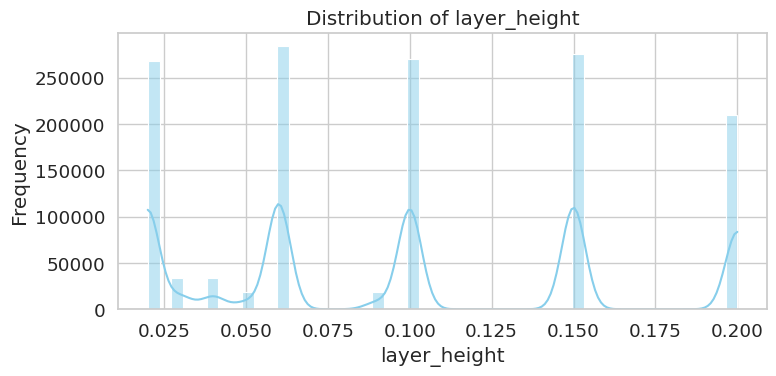

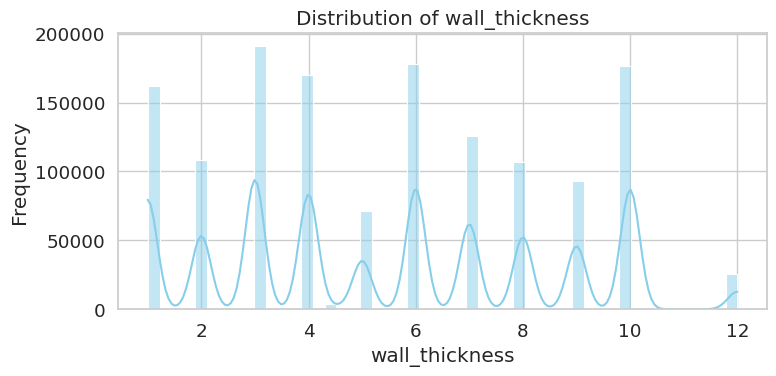

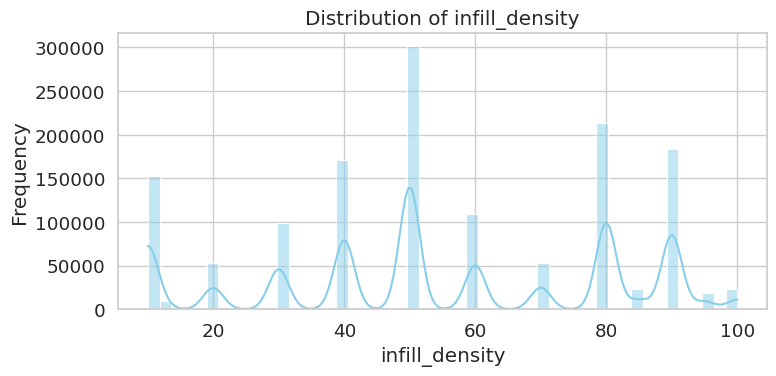

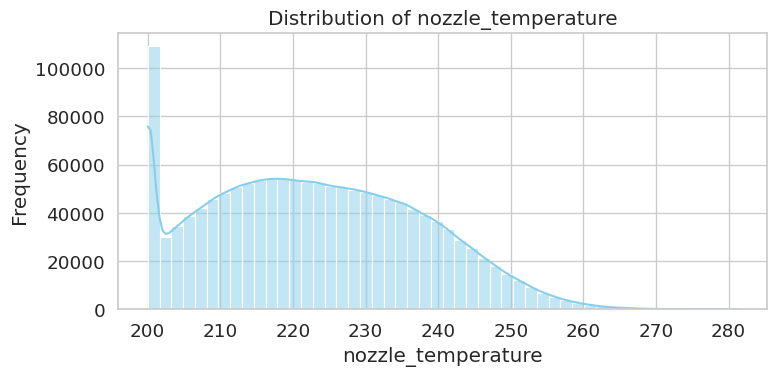

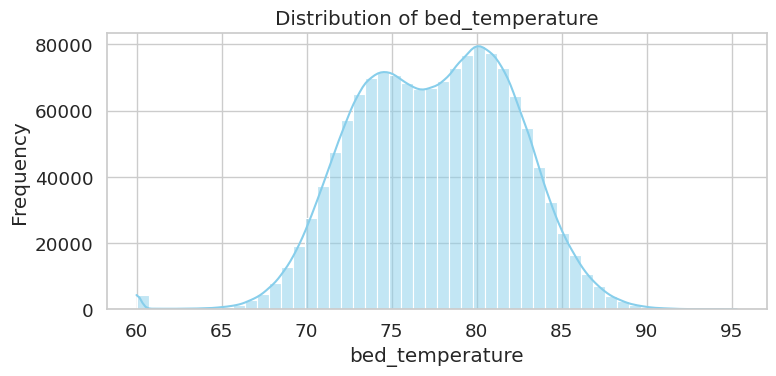

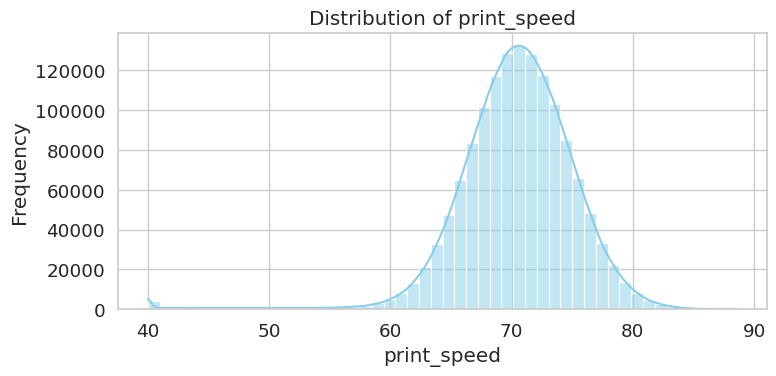

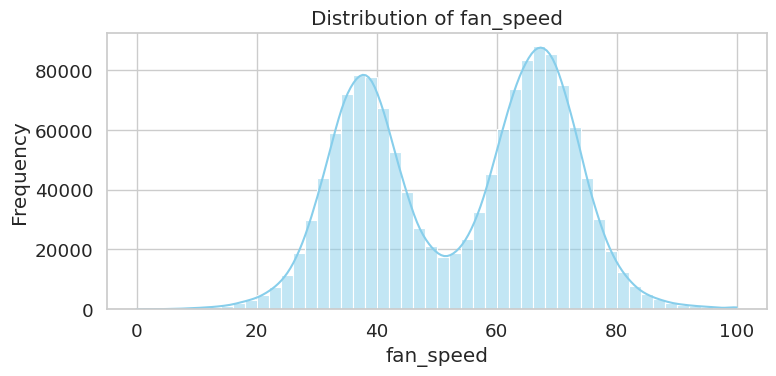

In [68]:
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df_bulk[col], kde=True, bins=50, color="skyblue")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

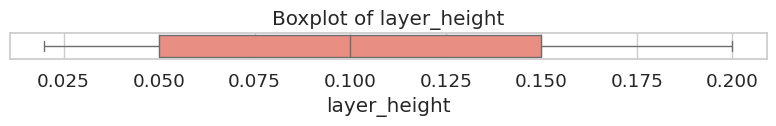

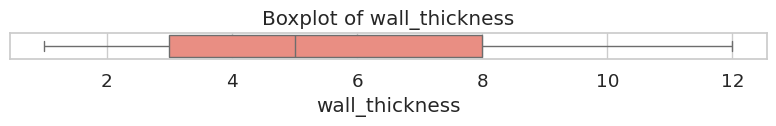

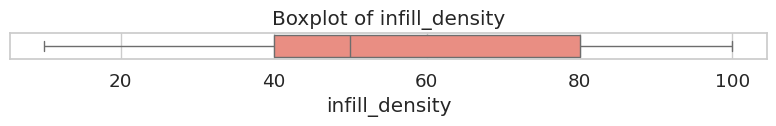

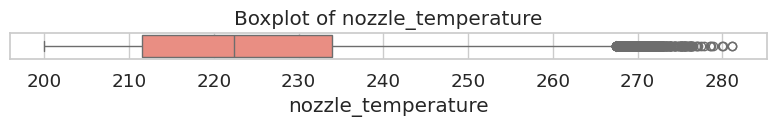

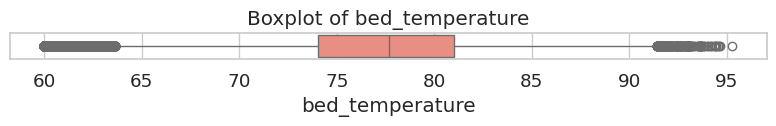

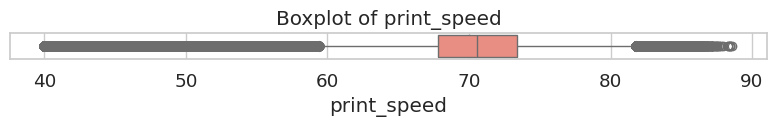

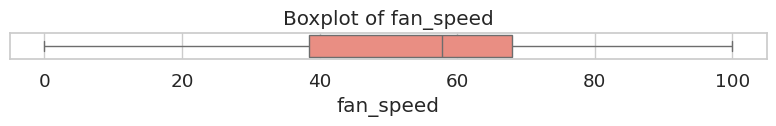

In [69]:
for col in numerical_cols:
    plt.figure(figsize=(8, 1.5))
    sns.boxplot(x=df_bulk[col], color="salmon")
    plt.title(f"Boxplot of {col}")
    plt.tight_layout()
    plt.show()

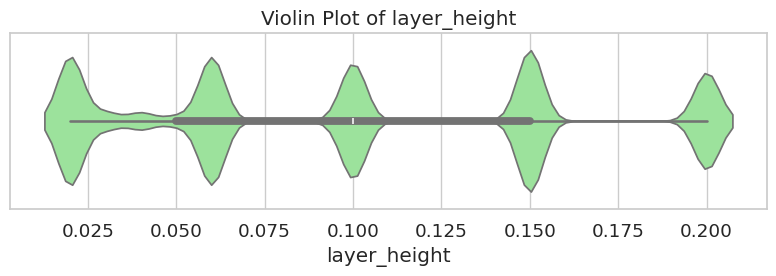

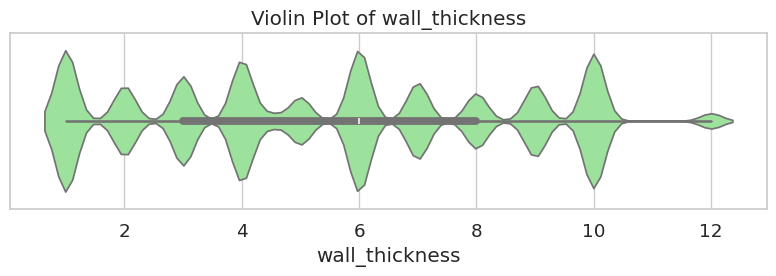

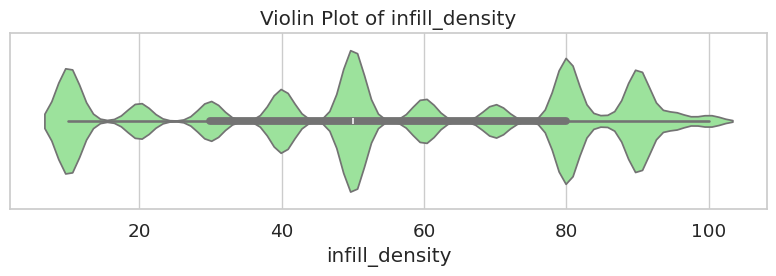

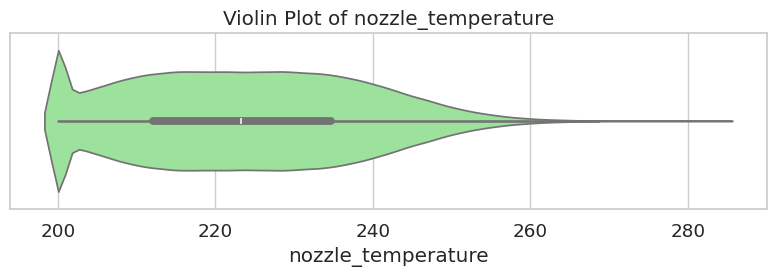

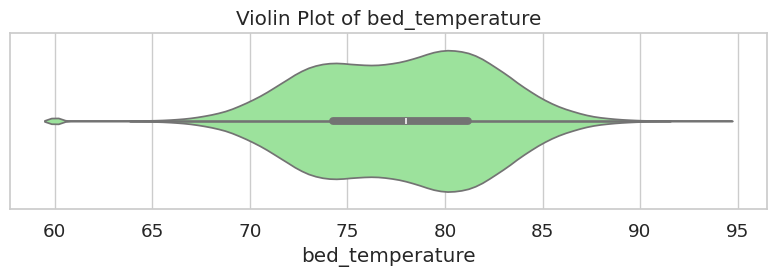

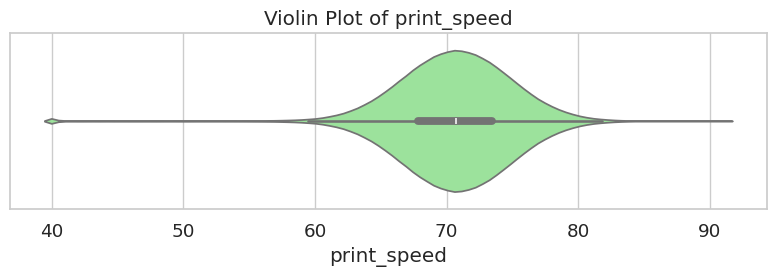

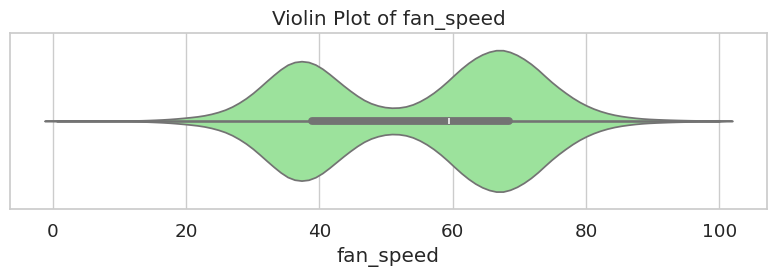

In [48]:
for col in numerical_cols:
    plt.figure(figsize=(8, 3))
    sns.violinplot(x=df_bulk[col], color="lightgreen")
    plt.title(f"Violin Plot of {col}")
    plt.tight_layout()
    plt.show()

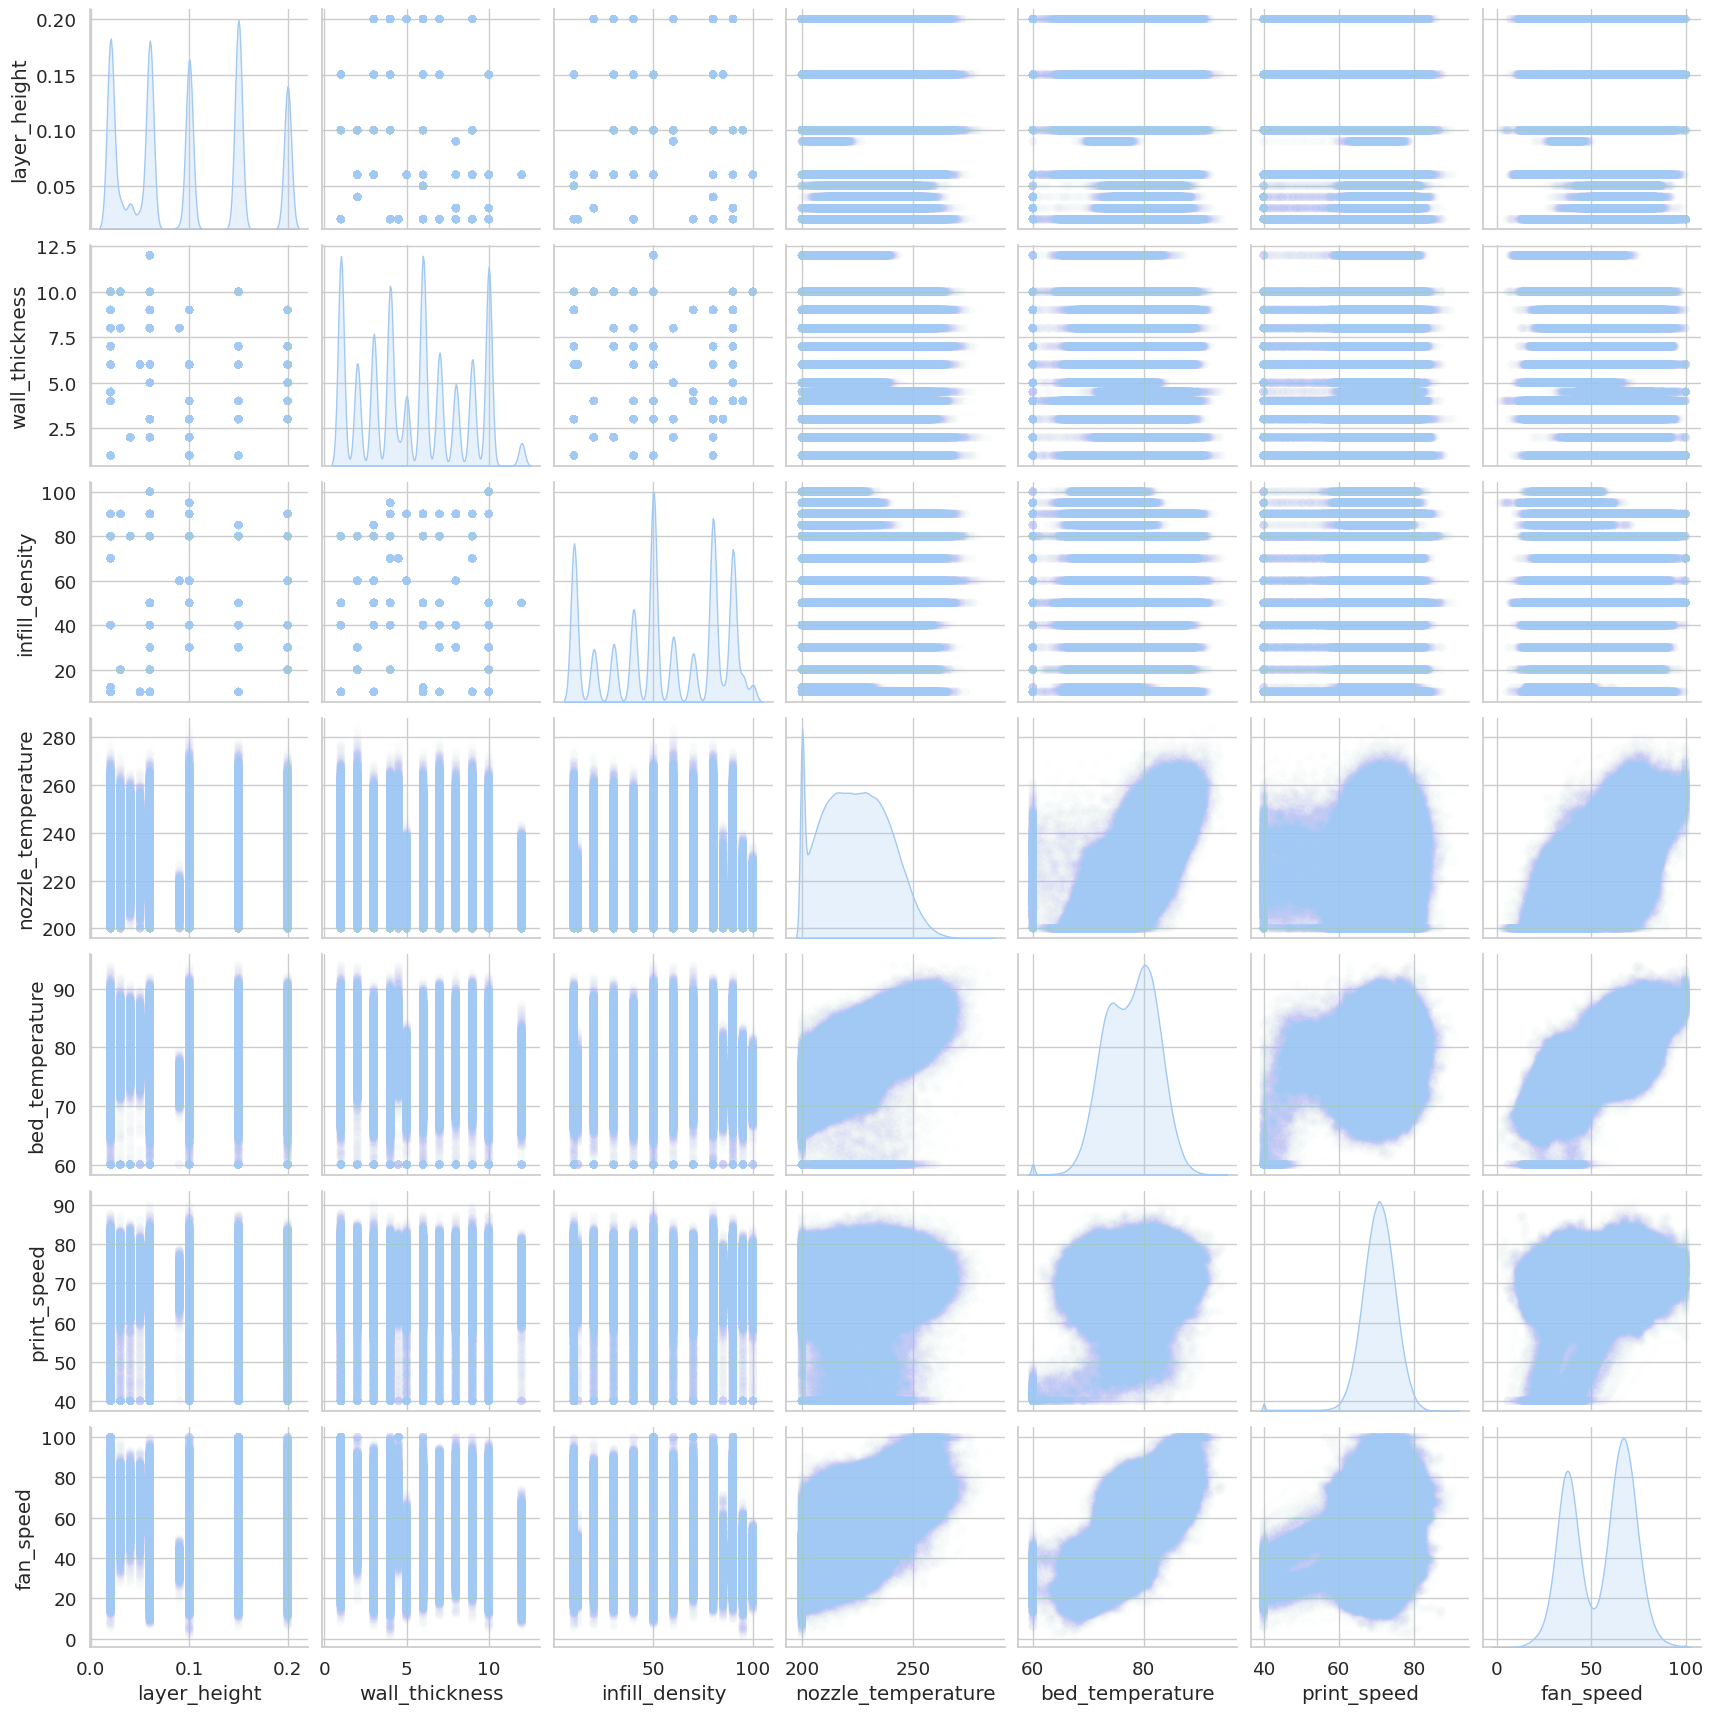

In [57]:
sns.pairplot(
    df_bulk[numerical_cols],
    diag_kind="kde",
    plot_kws=dict(alpha=0.01, edgecolor='none')
)
plt.show()

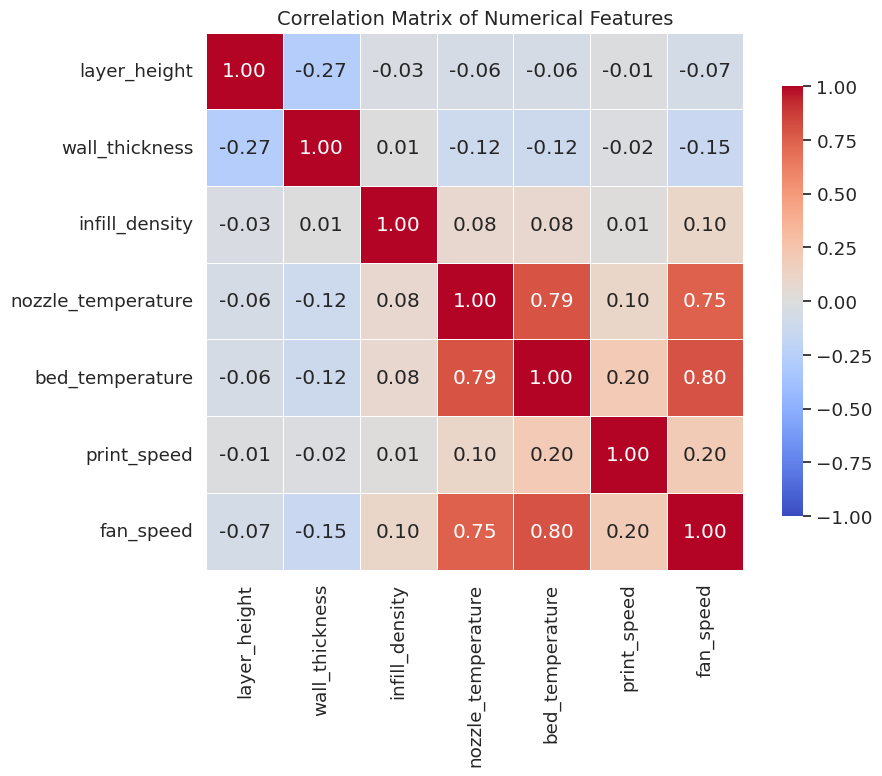

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute correlation matrix
corr_matrix = df_bulk[numerical_cols].corr()

# Set up the plot
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,           # Show correlation values
    fmt=".2f",            # Format the numbers
    cmap="coolwarm",      # Colormap
    vmin=-1, vmax=1,      # Correlation range
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)

plt.title("Correlation Matrix of Numerical Features", fontsize=14)
plt.tight_layout()
plt.show()

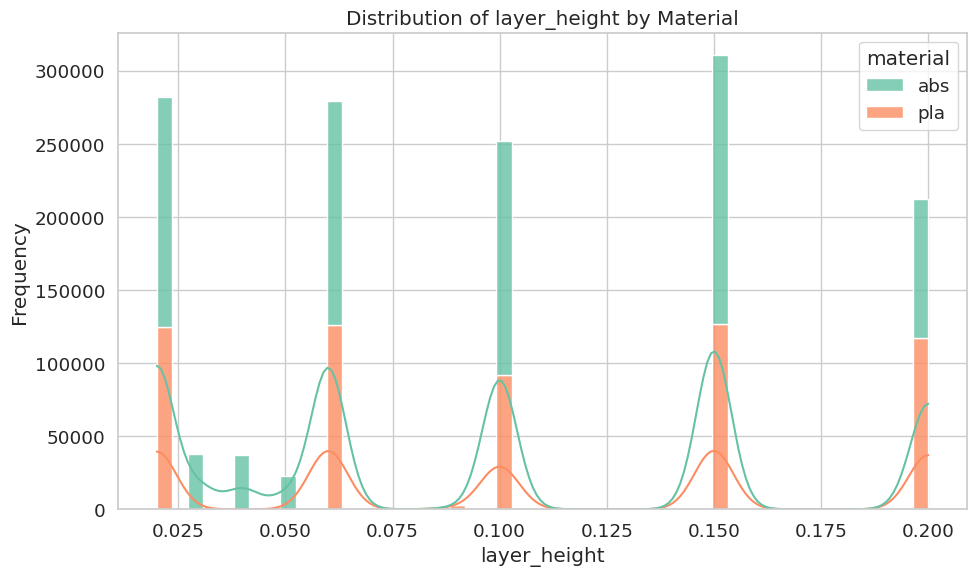

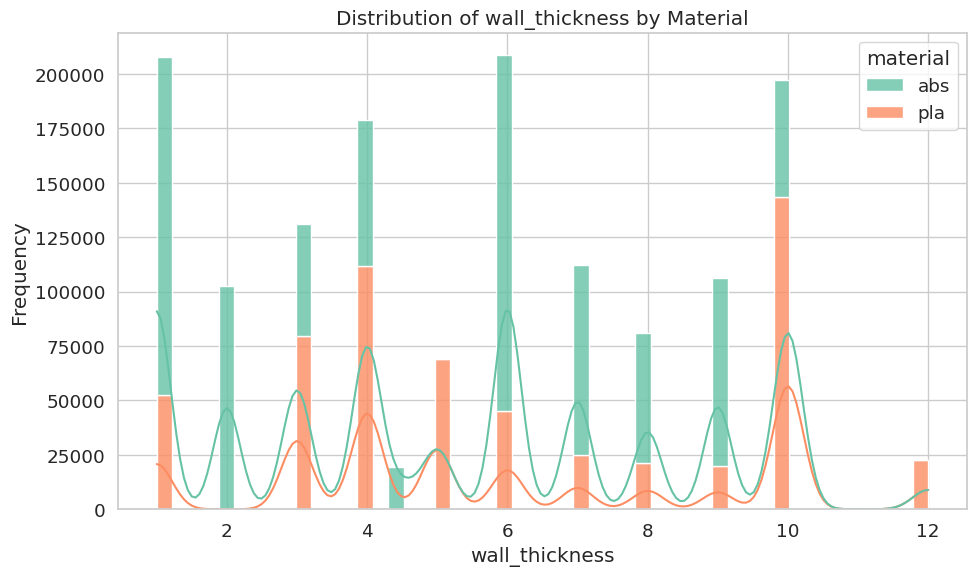

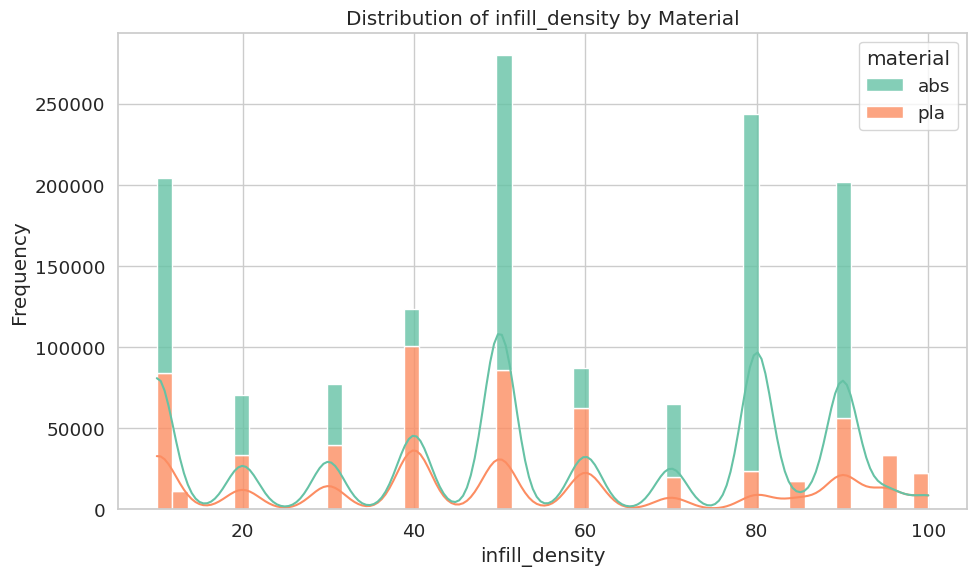

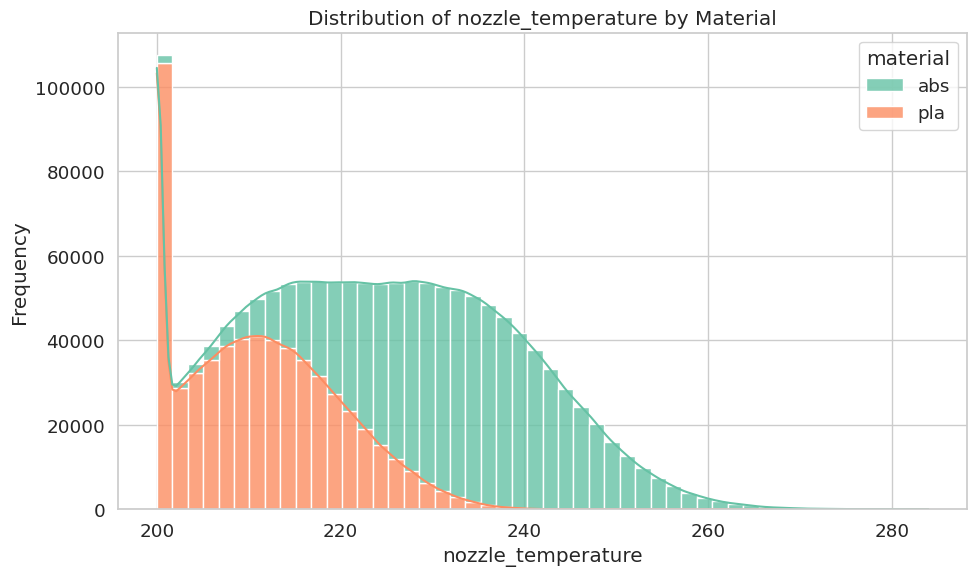

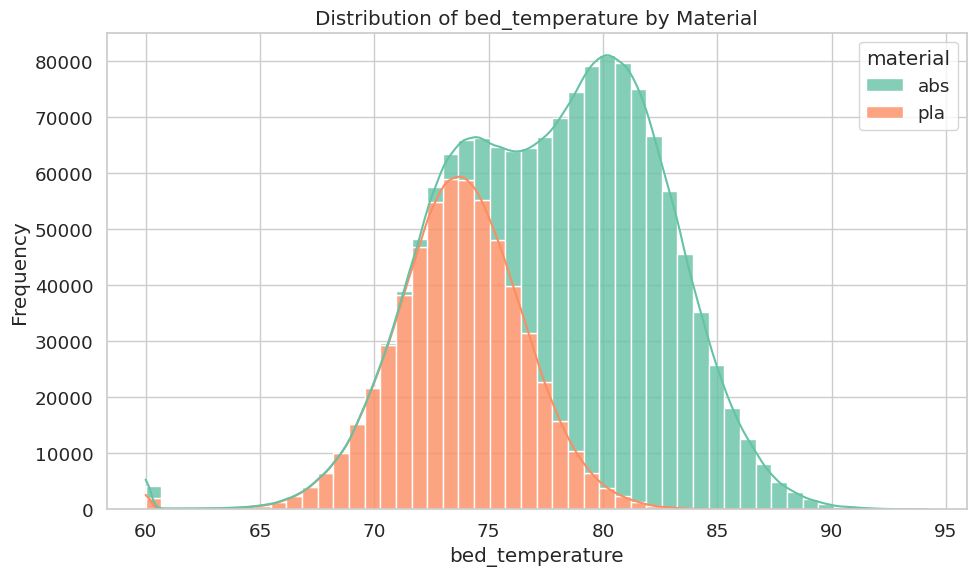

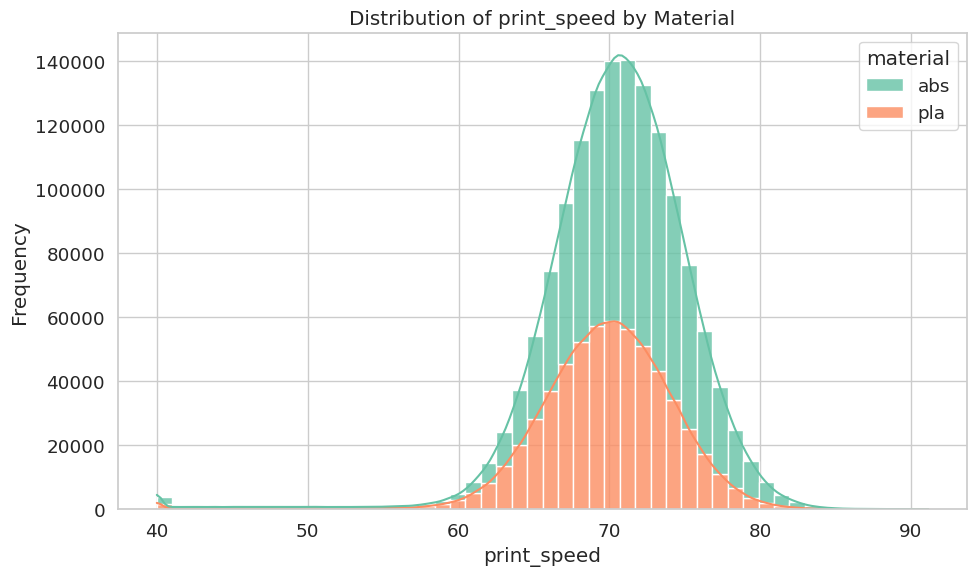

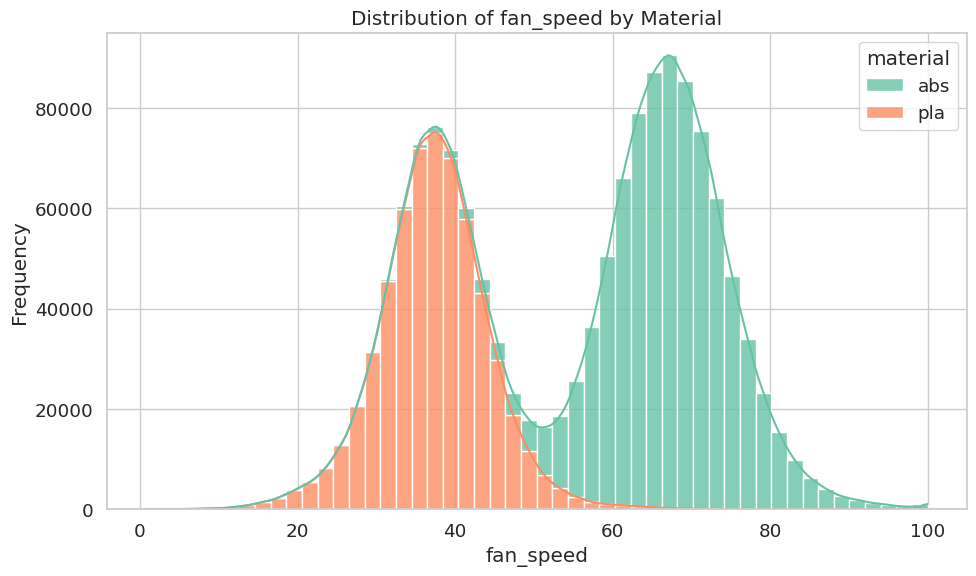

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = [
    'layer_height', 'wall_thickness', 'infill_density',
    'nozzle_temperature', 'bed_temperature', 'print_speed', 'fan_speed'
]

for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(
        data=df_bulk,
        x=col,
        hue="material",
        kde=True,
        bins=50,
        multiple="stack",   # or "layer" / "dodge" depending on style
        palette="Set2",
        alpha=0.8
    )
    plt.title(f"Distribution of {col} by Material")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

# 05 - Individual piece plots
These can be used to analyse a single run

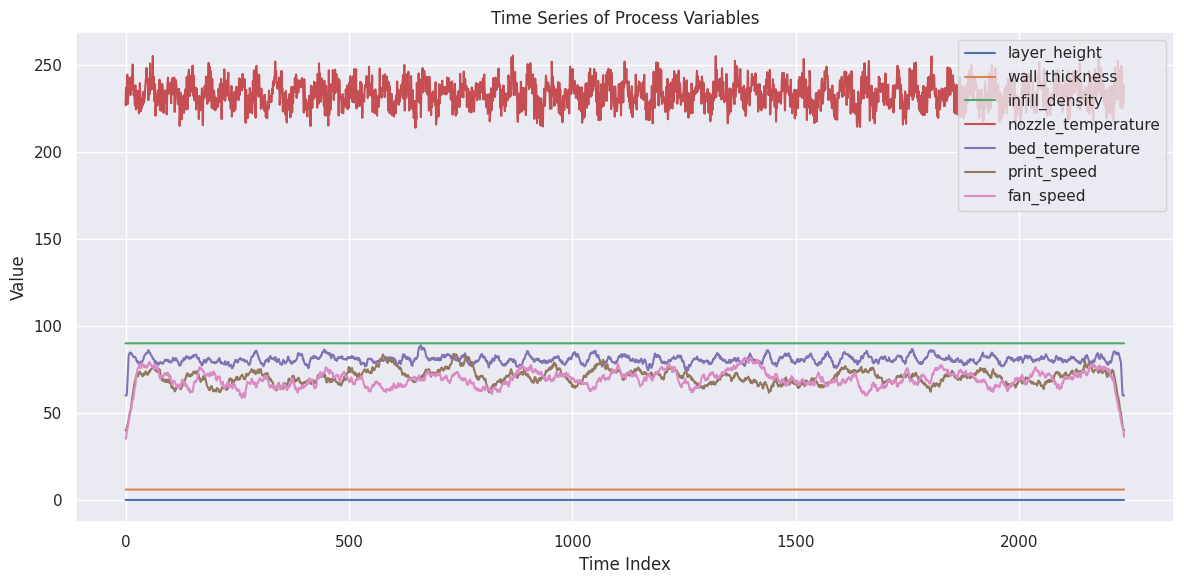

In [70]:
sns.set()

df_sim['t'] = range(len(df_sim))  # Add time axis

plt.figure(figsize=(12, 6))
for col in numerical_cols:
    plt.plot(df_sim['t'], df_sim[col], label=col)
plt.legend()
plt.title('Time Series of Process Variables')
plt.xlabel('Time Index')
plt.ylabel('Value')
plt.grid(True)
plt.tight_layout()
plt.show()

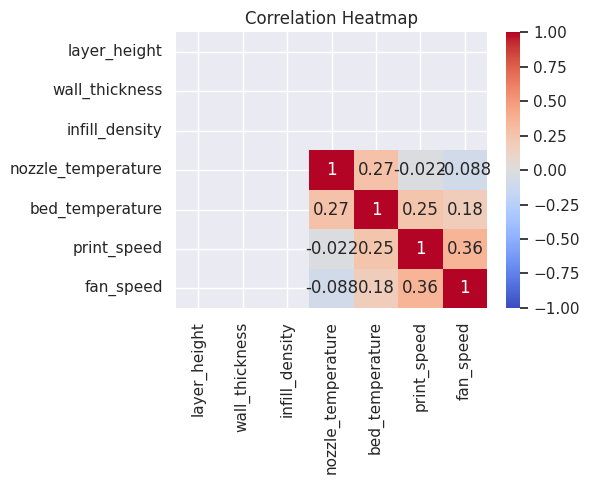

In [71]:
corr_matrix = df_sim[numerical_cols].corr()

plt.figure(figsize=(6, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

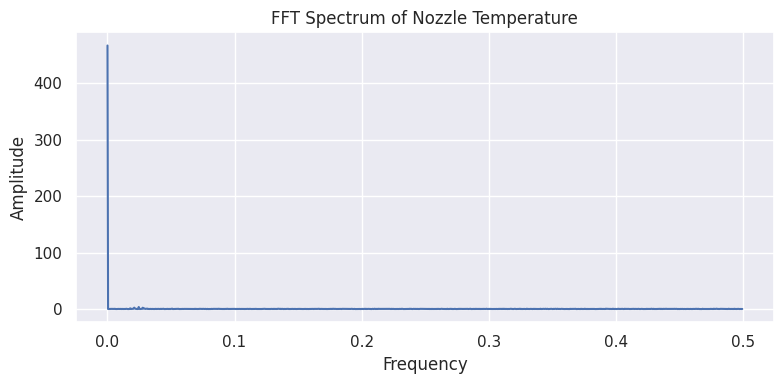

In [72]:
from scipy.fft import fft, fftfreq

N = len(df_sim)
T = 1.0  # Assume unit sampling for synthetic data
yf = fft(df_sim['nozzle_temperature'])
xf = fftfreq(N, T)[:N//2]

plt.figure(figsize=(8, 4))
plt.plot(xf, 2.0/N * np.abs(yf[:N//2]))
plt.title('FFT Spectrum of Nozzle Temperature')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.grid(True)
plt.tight_layout()
plt.show()


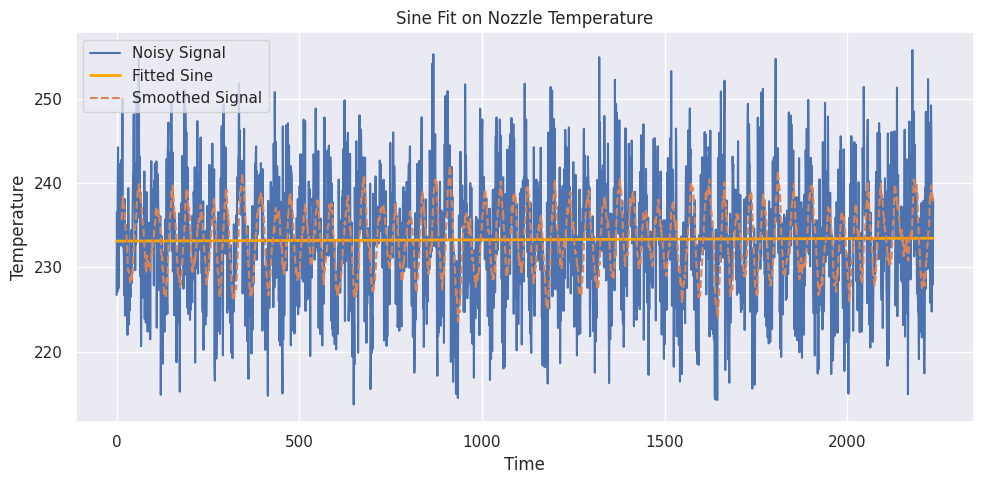

In [73]:
from scipy.optimize import curve_fit

def sine_func(t, A, f, phi, offset):
    return A * np.sin(2 * np.pi * f * t / len(t) + phi) + offset

t = np.arange(len(df_sim))
y = df_sim['nozzle_temperature'].values

popt, _ = curve_fit(sine_func, t, y, p0=[10, 0.01, 0, y.mean()])

plt.figure(figsize=(10, 5))
plt.plot(t, y, label='Noisy Signal')
plt.plot(t, sine_func(t, *popt), label='Fitted Sine', color='orange', linewidth=2)
plt.plot(t, df_sim["nozzle_temperature"].rolling(15).mean(), label="Smoothed Signal", linestyle="--")
plt.legend()
plt.title('Sine Fit on Nozzle Temperature')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.tight_layout()
plt.grid(True)
plt.show()



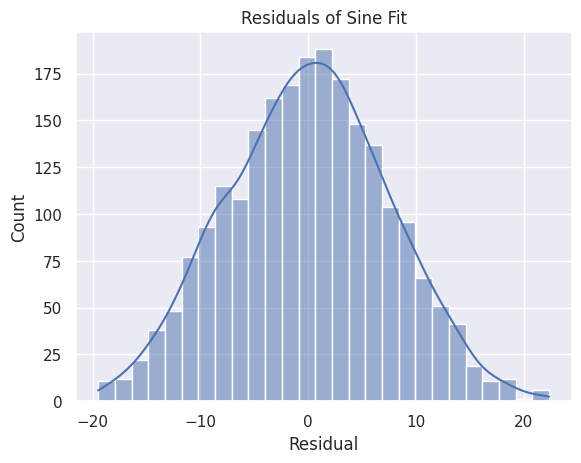

In [74]:
residuals = y - sine_func(t, *popt)
sns.histplot(residuals, kde=True)
plt.title('Residuals of Sine Fit')
plt.xlabel('Residual')
plt.grid(True)
plt.show()

In [75]:
cat_vars = ["material", "infill_pattern", "layer_height", "wall_thickness", "infill_density"]
for col in cat_vars:
    val = df_sim[col].iloc[0]
    print(f"{col}: {val}")

material: abs
infill_pattern: grid
layer_height: 0.02
wall_thickness: 6.0
infill_density: 90


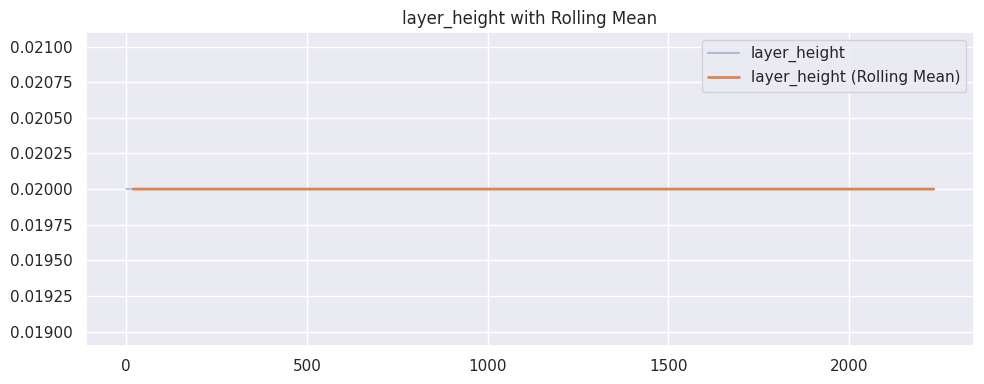

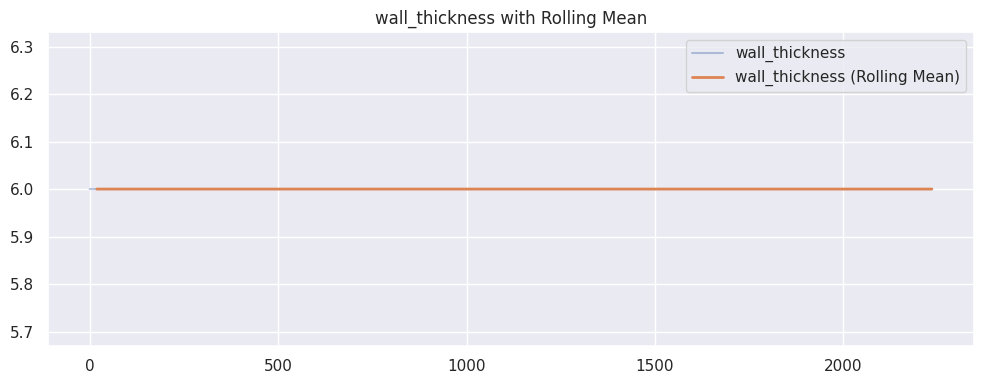

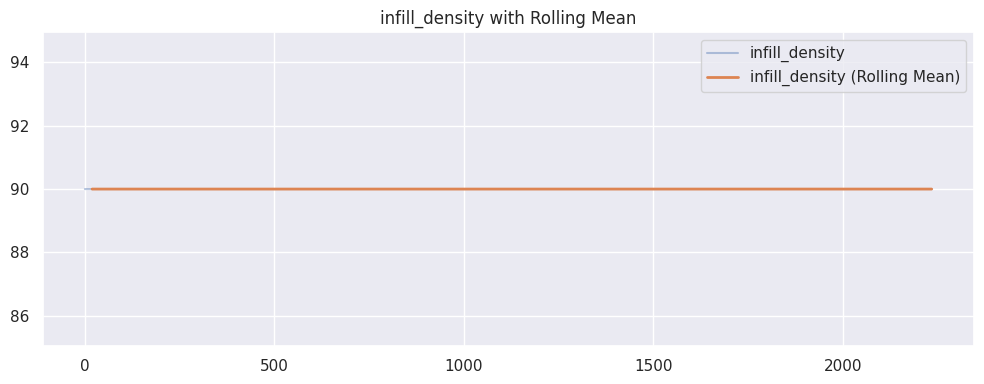

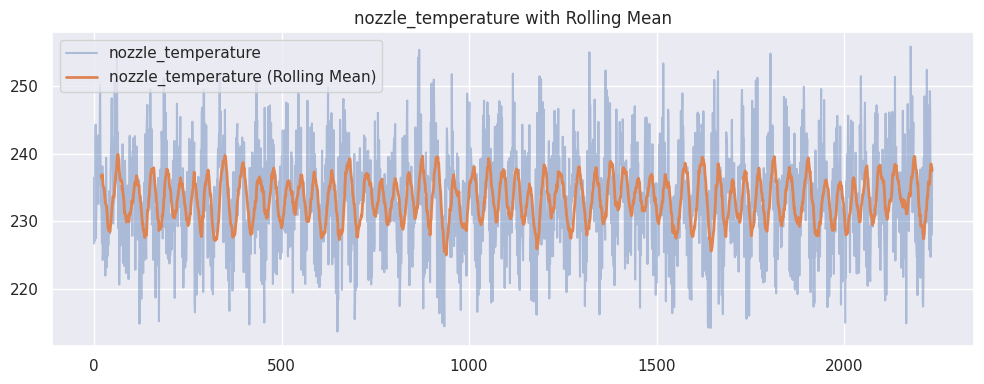

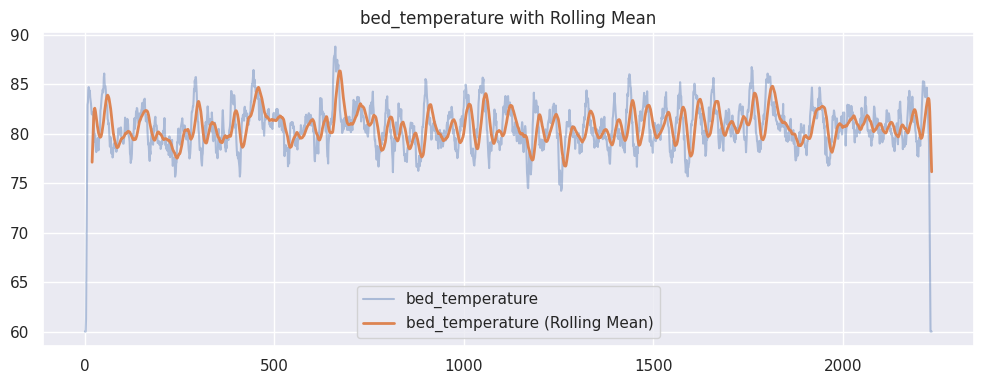

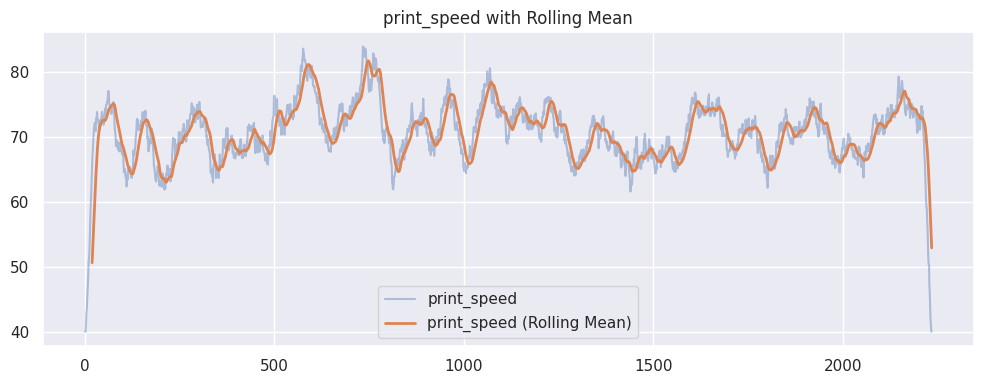

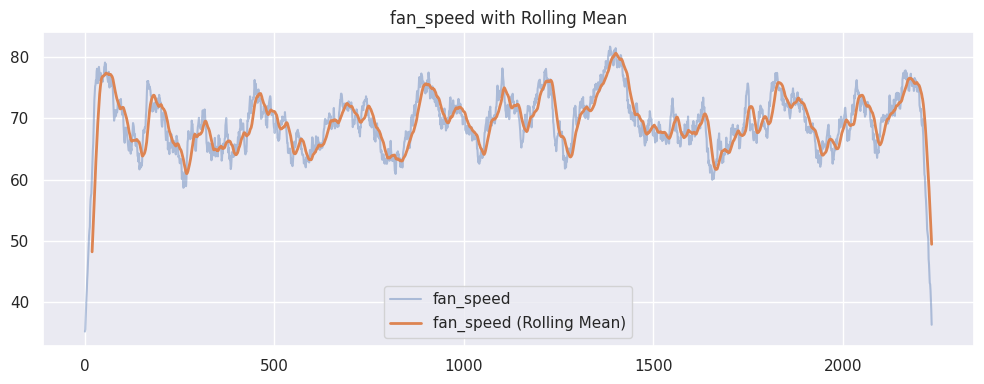

In [77]:
window = 20
for col in numerical_cols:
    plt.figure(figsize=(10, 4))
    plt.plot(df_sim['t'], df_sim[col], label=col, alpha=0.4)
    plt.plot(df_sim['t'], df_sim[col].rolling(window).mean(), label=f"{col} (Rolling Mean)", linewidth=2)
    plt.title(f"{col} with Rolling Mean")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

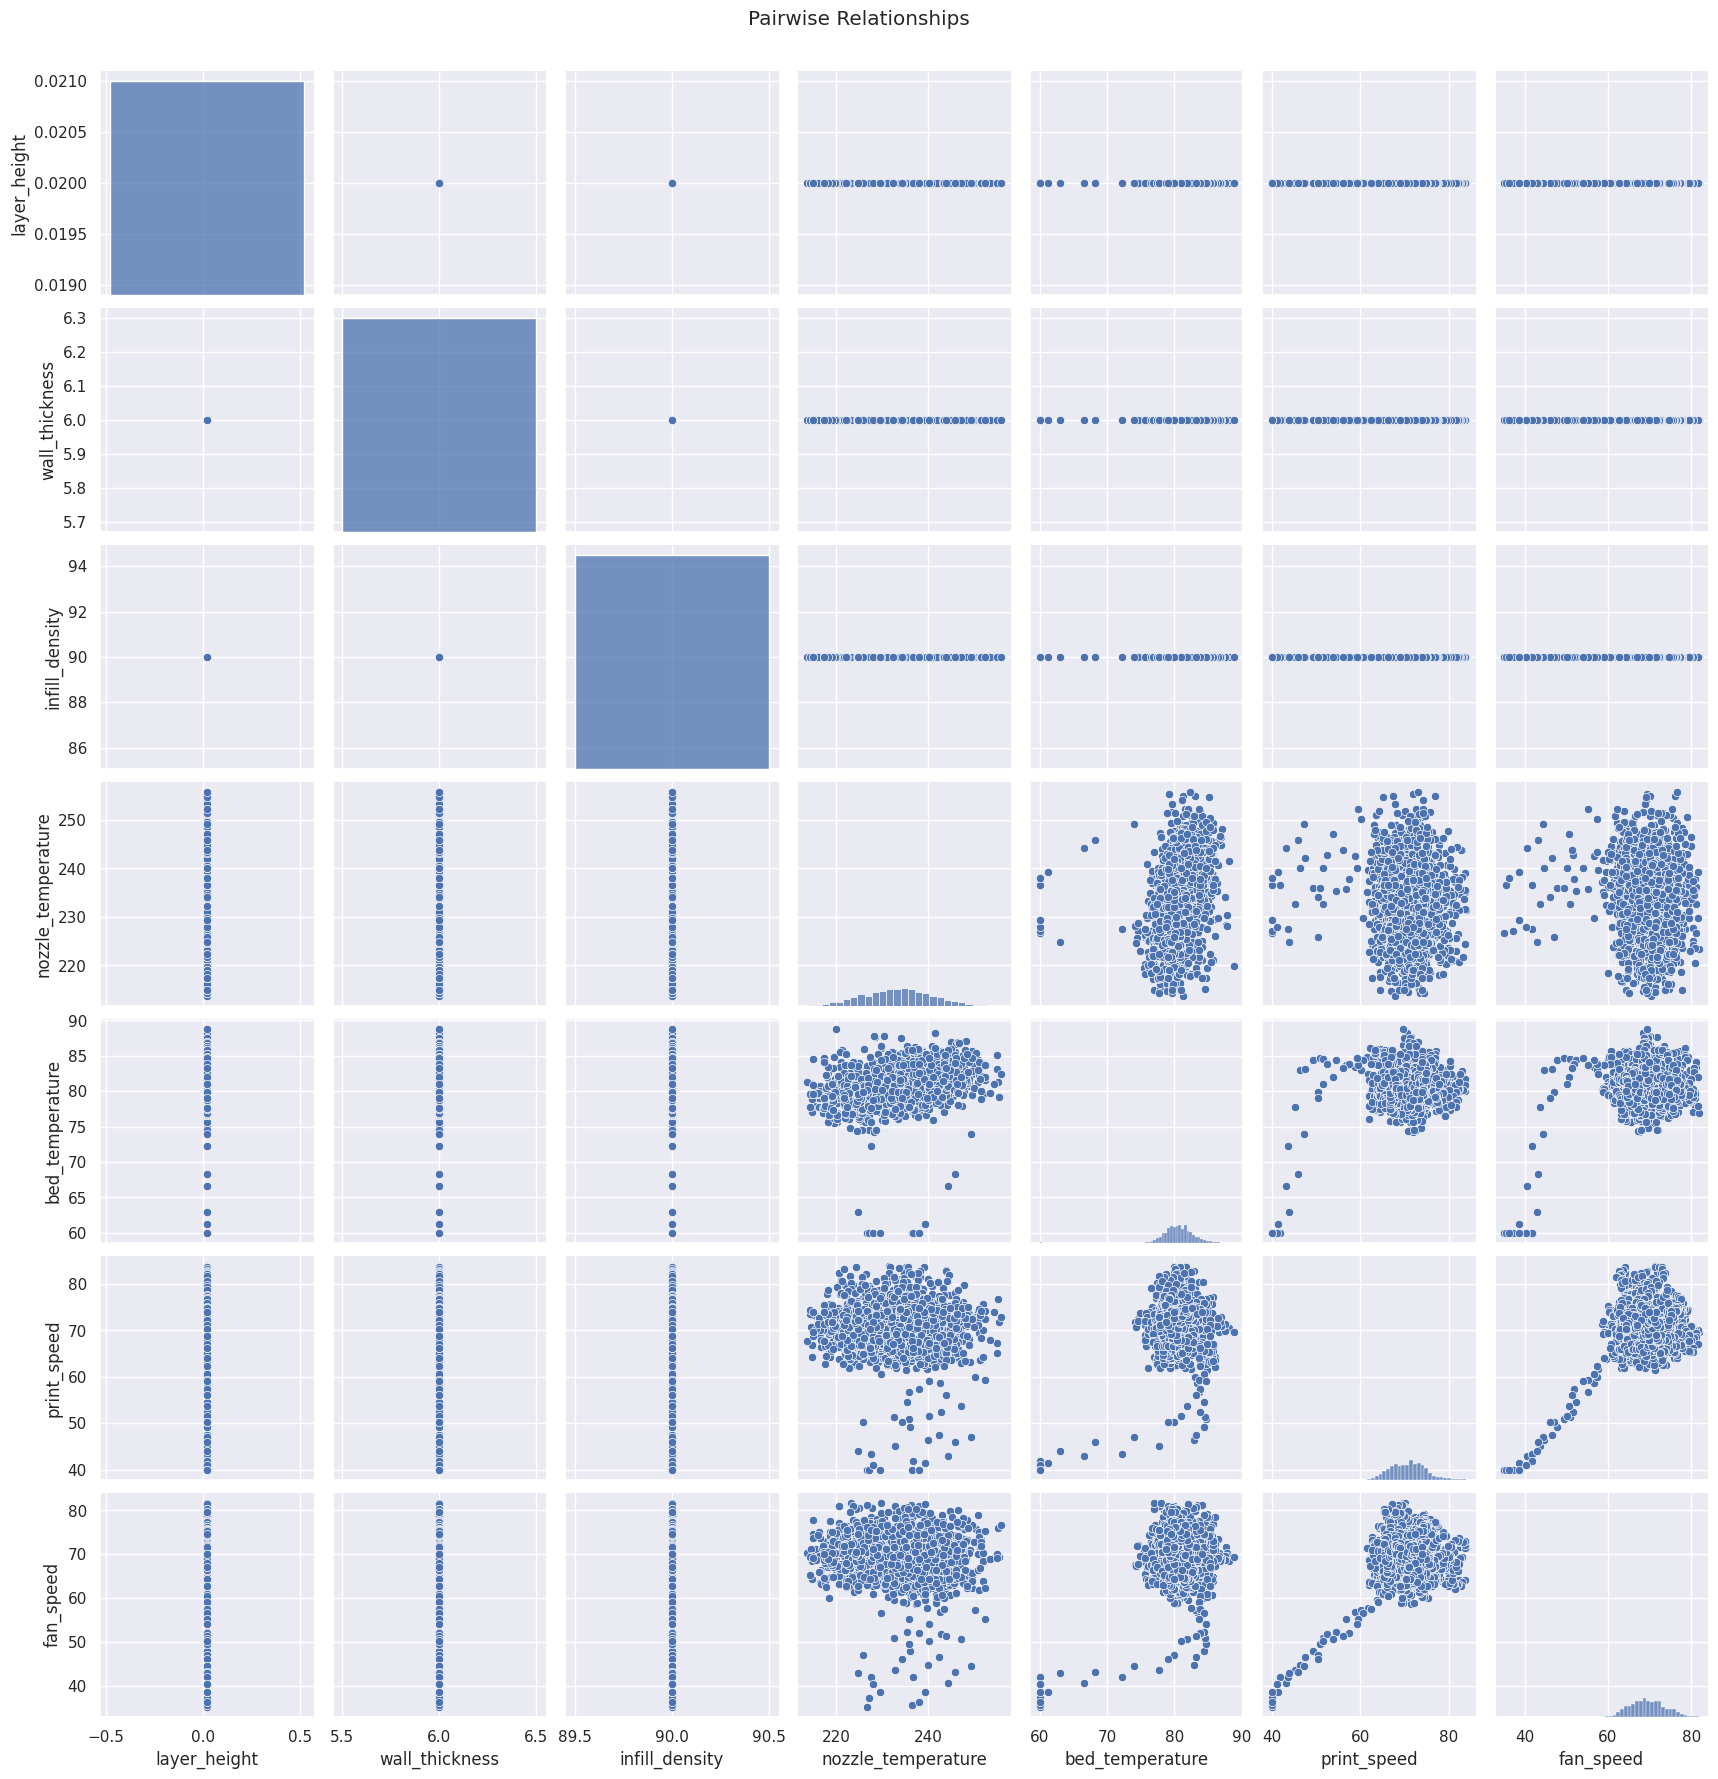

In [78]:
sns.pairplot(df_sim[numerical_cols])
plt.suptitle('Pairwise Relationships', y=1.02)
plt.show()

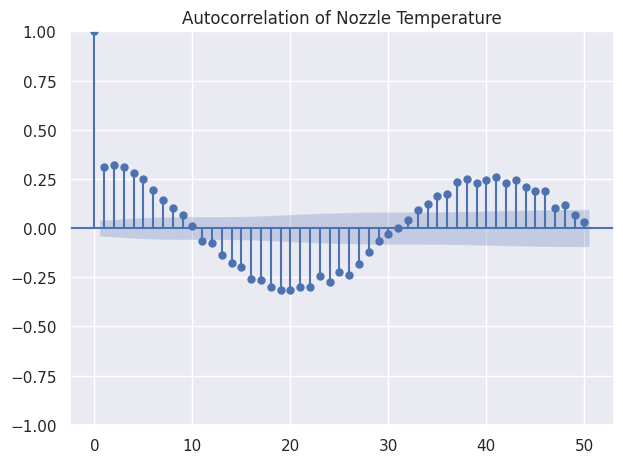

In [79]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(df_sim['nozzle_temperature'], lags=50)
plt.title("Autocorrelation of Nozzle Temperature")
plt.tight_layout()
plt.show()

# 06 - Individual vs bulk
This is an example of how to study a run vs several historic runs:

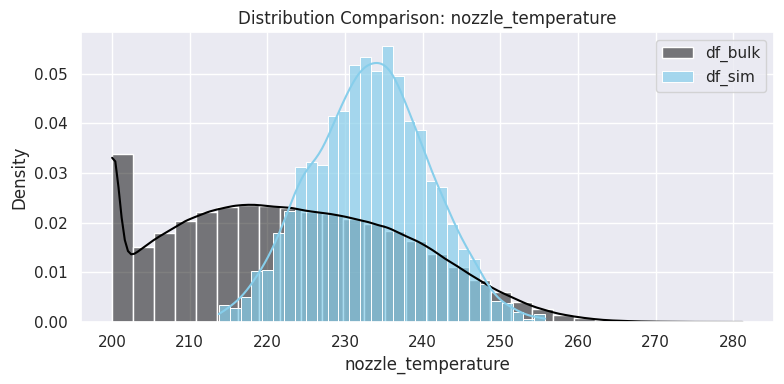

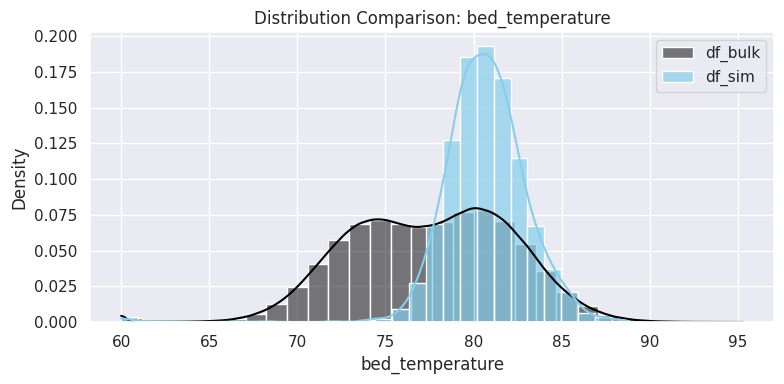

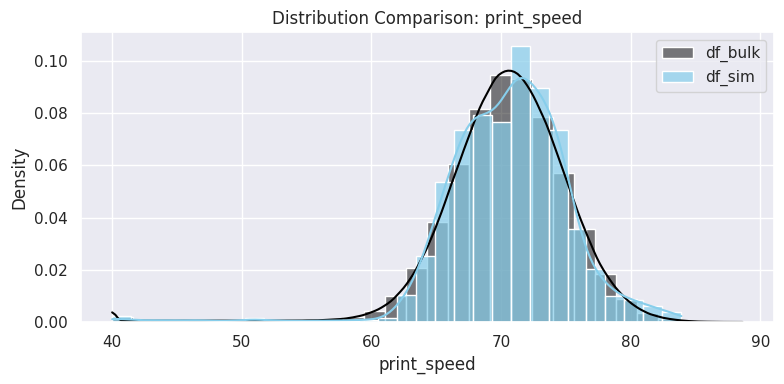

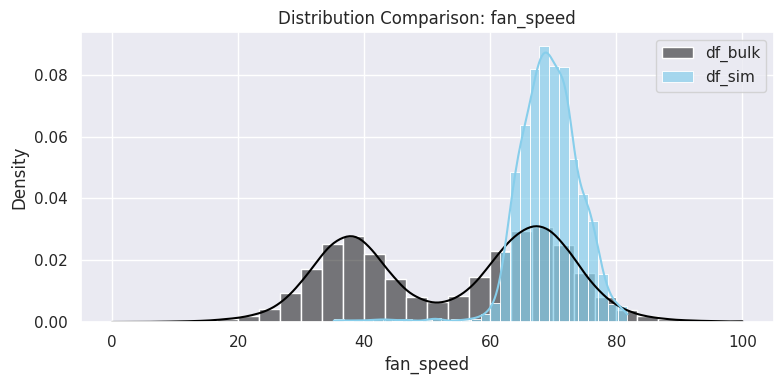

In [80]:
numerical_cols = ['nozzle_temperature', 'bed_temperature', 'print_speed', 'fan_speed']

for col in numerical_cols:
    plt.figure(figsize=(8, 4))

    sns.histplot(df_bulk[col], kde=True, bins=30, color='black', label='df_bulk', stat='density', alpha=0.5)
    sns.histplot(df_sim[col], kde=True, bins=30, color='skyblue', label='df_sim', stat='density', alpha=0.7)

    plt.title(f'Distribution Comparison: {col}')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

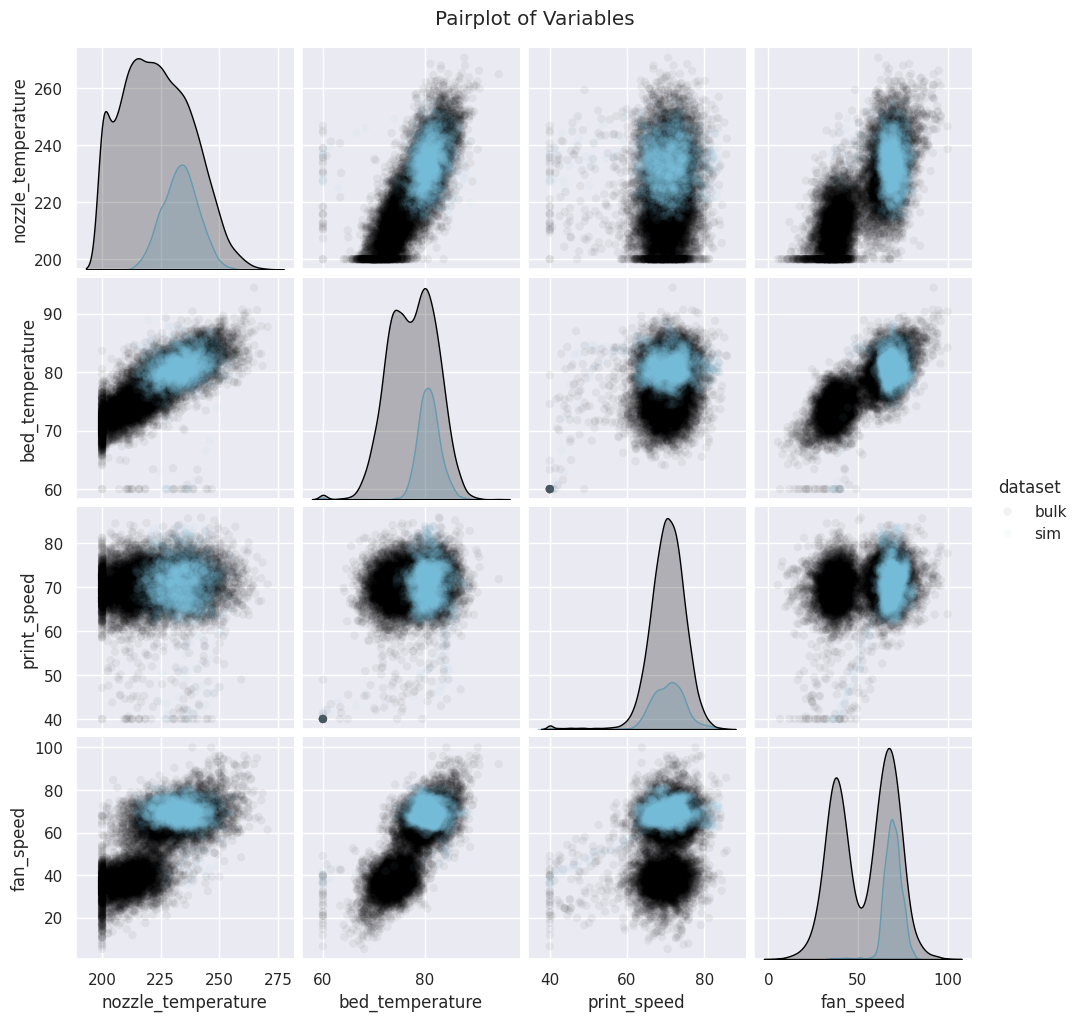

In [81]:
sns.pairplot(pd.concat([
    df_bulk[numerical_cols].assign(dataset='bulk').sample(10000),
    df_sim[numerical_cols].assign(dataset='sim')
]), plot_kws=dict(alpha=0.05, edgecolor='none'), hue='dataset', palette=dict(bulk='black', sim='skyblue'))
plt.suptitle('Pairplot of Variables', y=1.02)
plt.show()

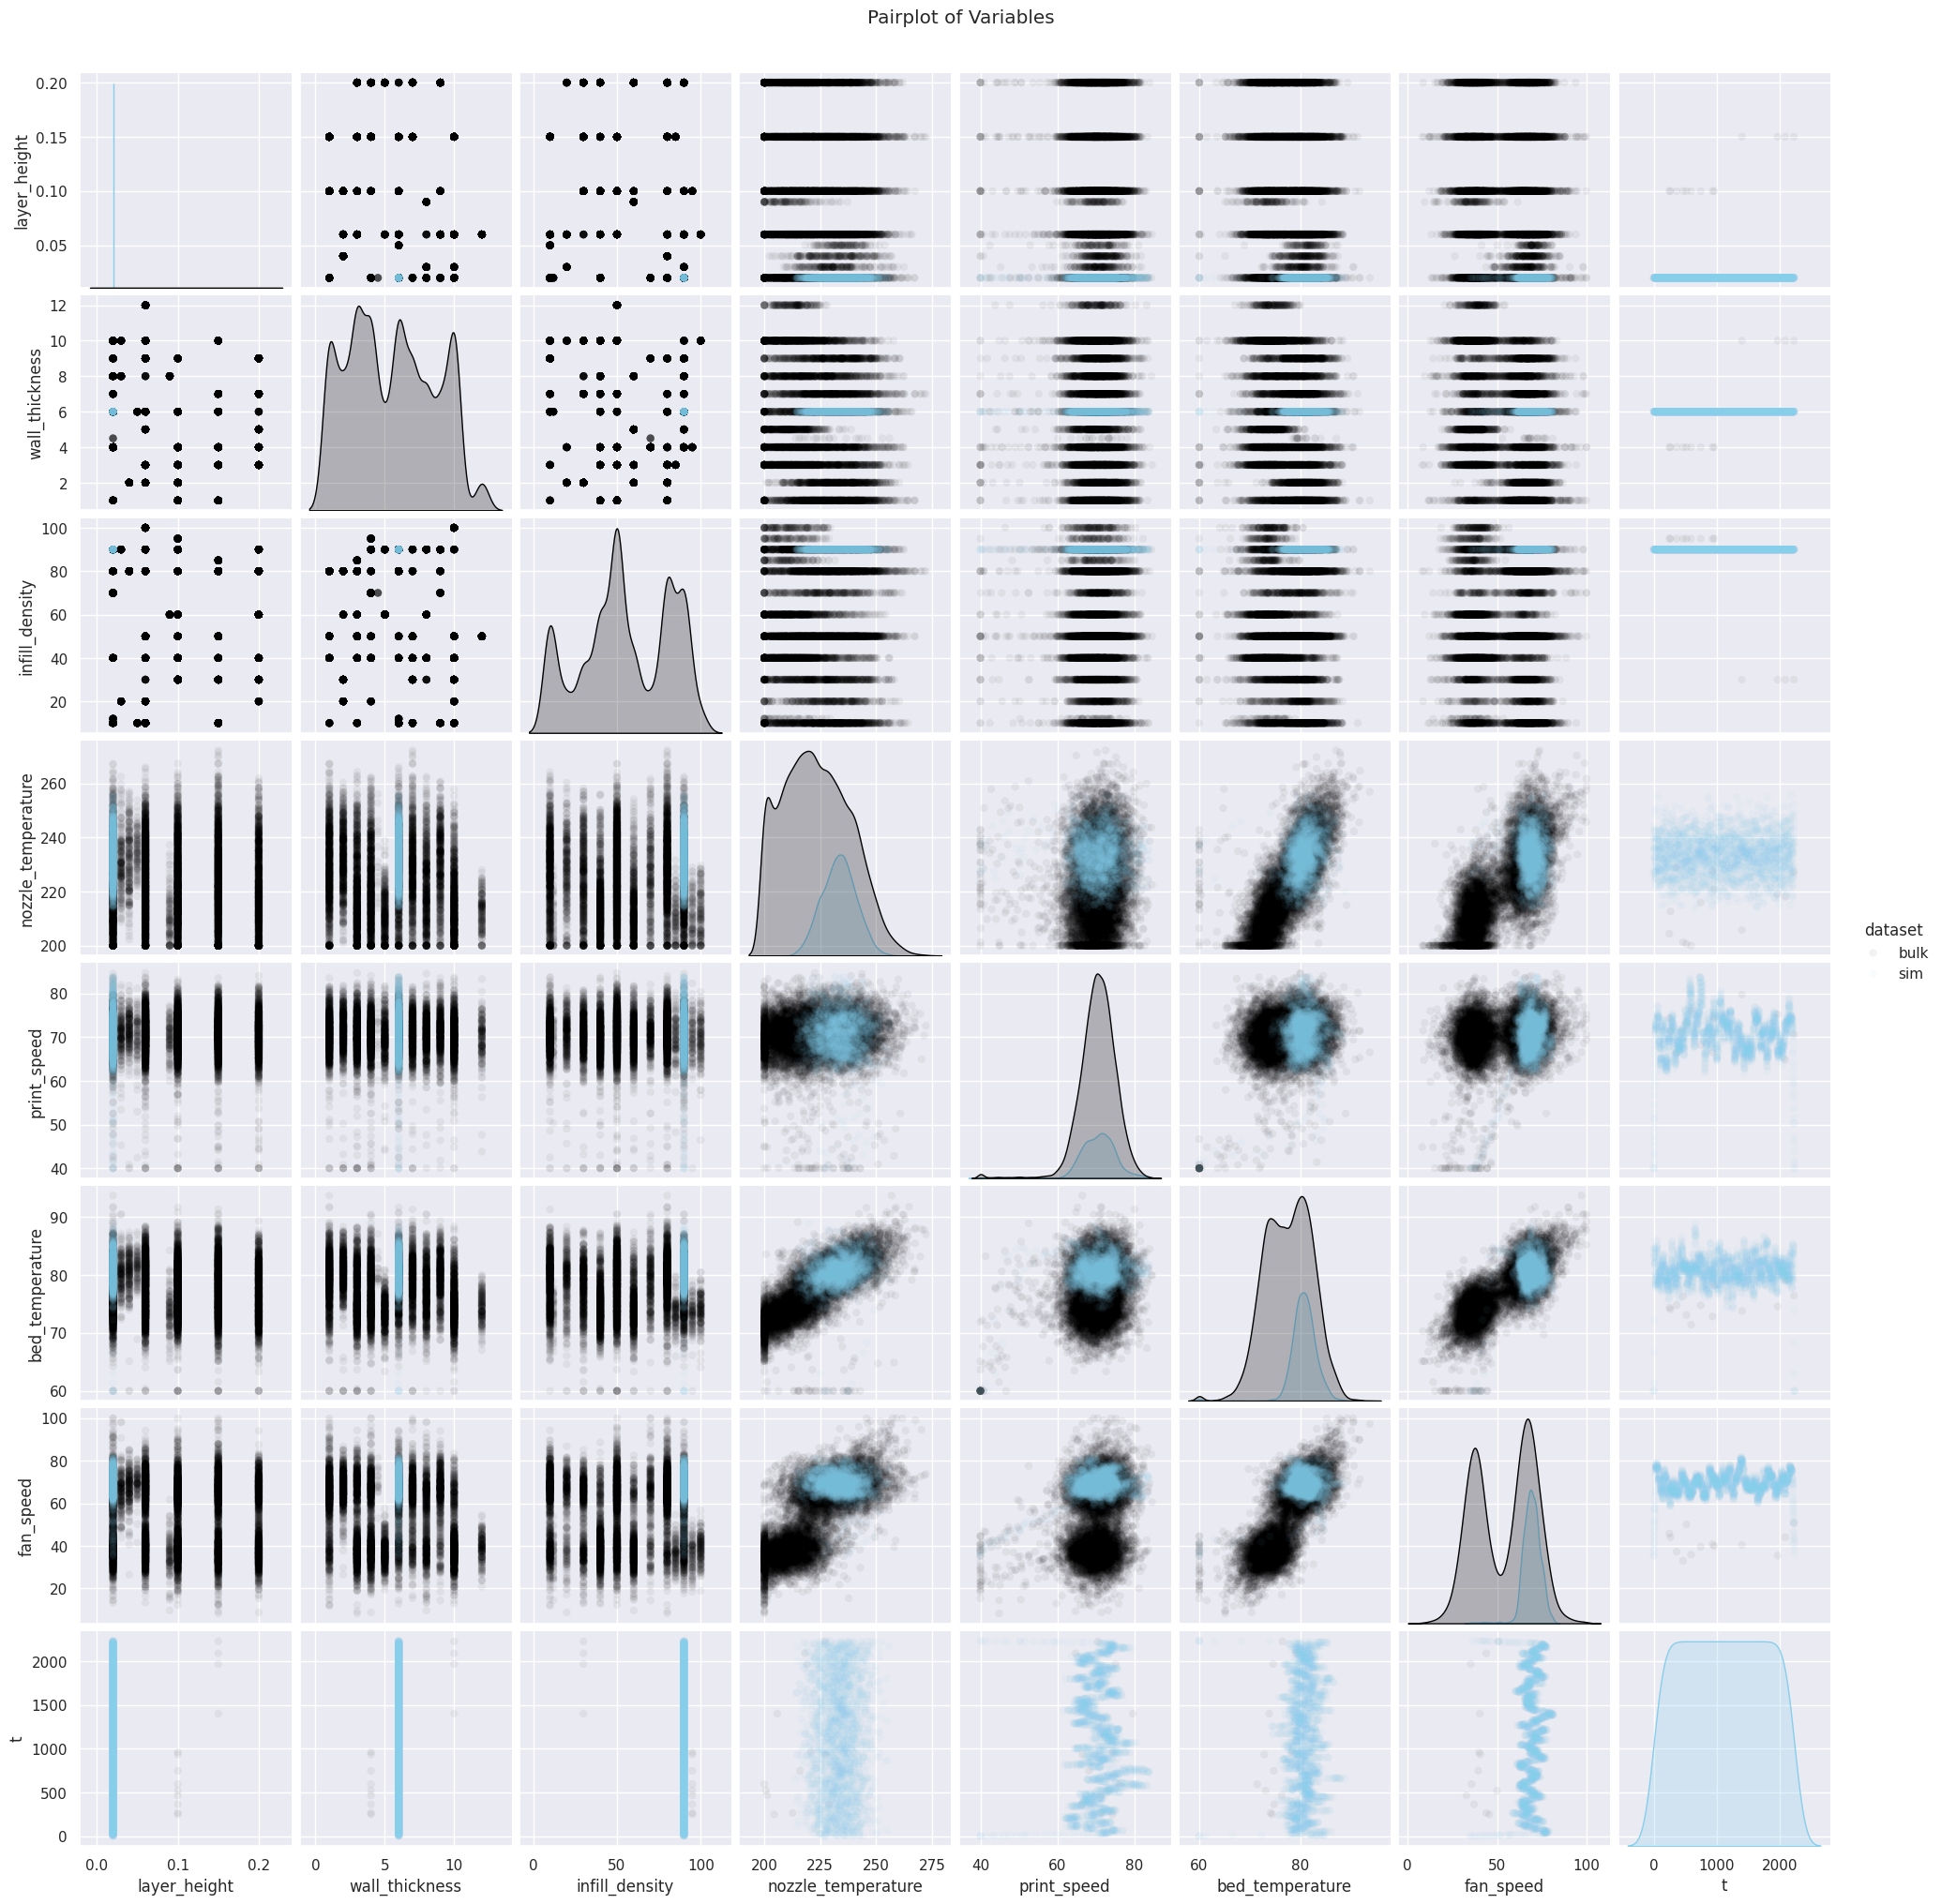

In [82]:
sns.pairplot(pd.concat([
    df_bulk.assign(dataset='bulk').sample(10000),
    df_sim.assign(dataset='sim')
]), plot_kws=dict(alpha=0.05, edgecolor='none'), hue='dataset', palette=dict(bulk='black', sim='skyblue'))
plt.suptitle('Pairplot of Variables', y=1.02)
plt.show()

/tmp/ipython-input-83-2883329880.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=pd.concat([


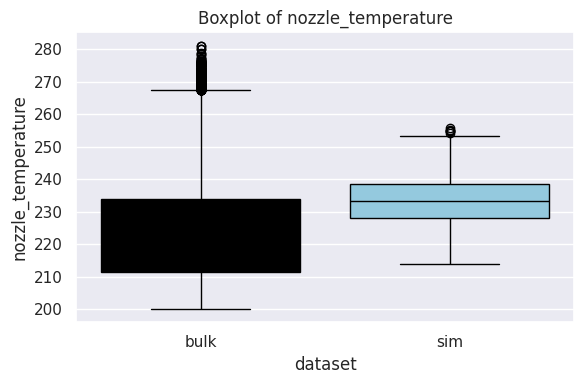

/tmp/ipython-input-83-2883329880.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=pd.concat([


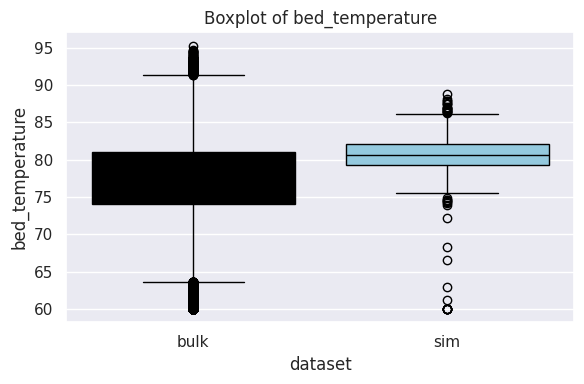

/tmp/ipython-input-83-2883329880.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=pd.concat([


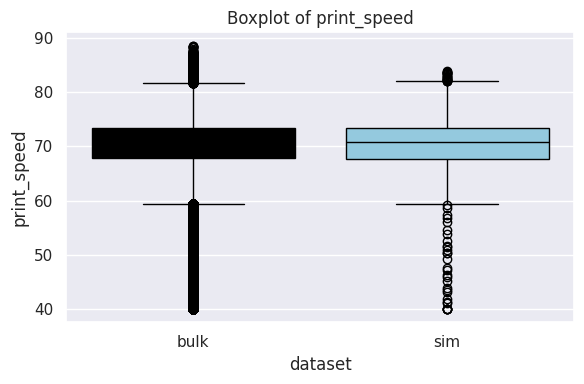

/tmp/ipython-input-83-2883329880.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=pd.concat([


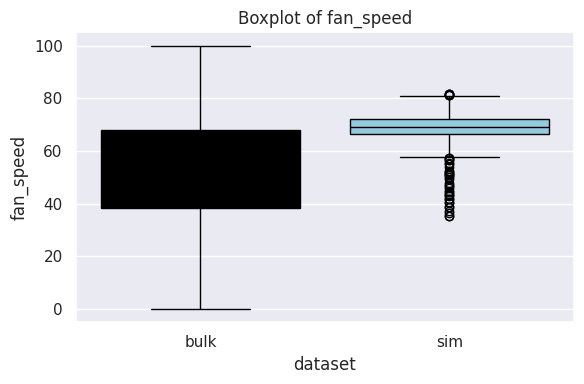

In [83]:
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=pd.concat([
        df_bulk[[col]].assign(dataset='bulk'),
        df_sim[[col]].assign(dataset='sim')
    ]), x='dataset', y=col, palette=dict(bulk='black', sim='skyblue'))
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()

In [84]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import numpy as np
import pandas as pd
from scipy.stats import percentileofscore

def linspace_rounded_to_nearest_5(y, num_ticks=5):
    # Step 1: Find min and max
    y_min, y_max = y.min(), y.max()

    # Step 2: Round min down and max up to nearest multiple of 5
    y_min_5 = np.floor(y_min / 5) * 5
    y_max_5 = np.ceil(y_max / 5) * 5

    # Step 3: Create linspace between those rounded bounds
    return np.linspace(y_min_5, y_max_5, num_ticks)


def plot_timeseries_with_distribution(df_sim, df_bulk, col):
    t = np.arange(len(df_sim))
    y = df_sim[col].values
    y_bulk = df_bulk[col].values

    # Percentile transformation
    y_scaled = (y - y_bulk.min()) / (y_bulk.max() - y_bulk.min())
    y_bulk_scaled = (y_bulk - y_bulk.min()) / (y_bulk.max() - y_bulk.min())

    # Create figure and gridspec
    fig = plt.figure(figsize=(15, 8))
    gs = gridspec.GridSpec(2, 2, width_ratios=[1, 6], height_ratios=[1, 1], hspace=0.1, wspace=0.05)

    # === Top Left: Histogram of df_sim[col] ===
    ax0 = plt.subplot(gs[0, 0])
    ax0.hist(df_sim[col], bins=30, orientation='horizontal', color='skyblue', edgecolor='black')
    ax0.invert_xaxis()
    ax0.set_yticks(linspace_rounded_to_nearest_5(y, num_ticks=6))
    ax0.set_xticks([])
    ax0.set_ylabel(f"{col.capitalize()}\ndistribution", fontsize=12)
    ax0.set_xlabel('')

    # === Top Right: Time Series ===
    ax1 = plt.subplot(gs[0, 1])
    ax1.plot(t, y, color='skyblue', label=col)
    ax1.set_ylabel('')
    ax1.set_yticks(linspace_rounded_to_nearest_5(y, num_ticks=6))
    ax1.tick_params(labelleft=False)  # hide y tick labels
    ax1.set_title(f'{col} Time Series with Distribution')
    ax1.grid(True)

    # === Bottom Left: Vertical KDE Histograms ===
    ax2 = plt.subplot(gs[1, 0], sharey=None)  # do not sharey explicitly here
    sns.kdeplot(y=y_bulk_scaled, ax=ax2, color='black', label='df_bulk', fill=True, alpha=0.5, linewidth=1.5)
    sns.kdeplot(y=y_scaled, ax=ax2, color='skyblue', label='df_sim', fill=True, alpha=0.7, linewidth=1.5)
    ax2.invert_xaxis()
    ax2.set_ylim(0, 1)
    ax2.set_yticks(np.linspace(0, 1, 6))
    ax2.set_xticks([])
    ax2.set_ylabel(f"{col.capitalize()}\nrelative distribution", fontsize=12)
    ax2.set_xlabel('')
    ax2.grid(True, axis='y', linestyle='--', alpha=0.4)

    # === Bottom Right: Percentile Time Series ===
    ax3 = plt.subplot(gs[1, 1], sharey=ax2)  # share Y axis with ax2
    ax3.plot(t, y_scaled, color='skyblue')
    ax3.set_ylabel('')
    ax3.set_yticks(np.linspace(0, 1, 6))
    ax3.tick_params(labelleft=False)  # hide y tick labels
    ax3.set_ylim(0, 1)
    ax3.set_xlabel('Time Index')
    ax3.grid(True, axis='y', linestyle='--', alpha=0.4)

    # Legend (placed globally)
    handles, labels = ax2.get_legend_handles_labels()
    if handles:
        fig.legend(handles, labels, loc='upper right')

    plt.show()

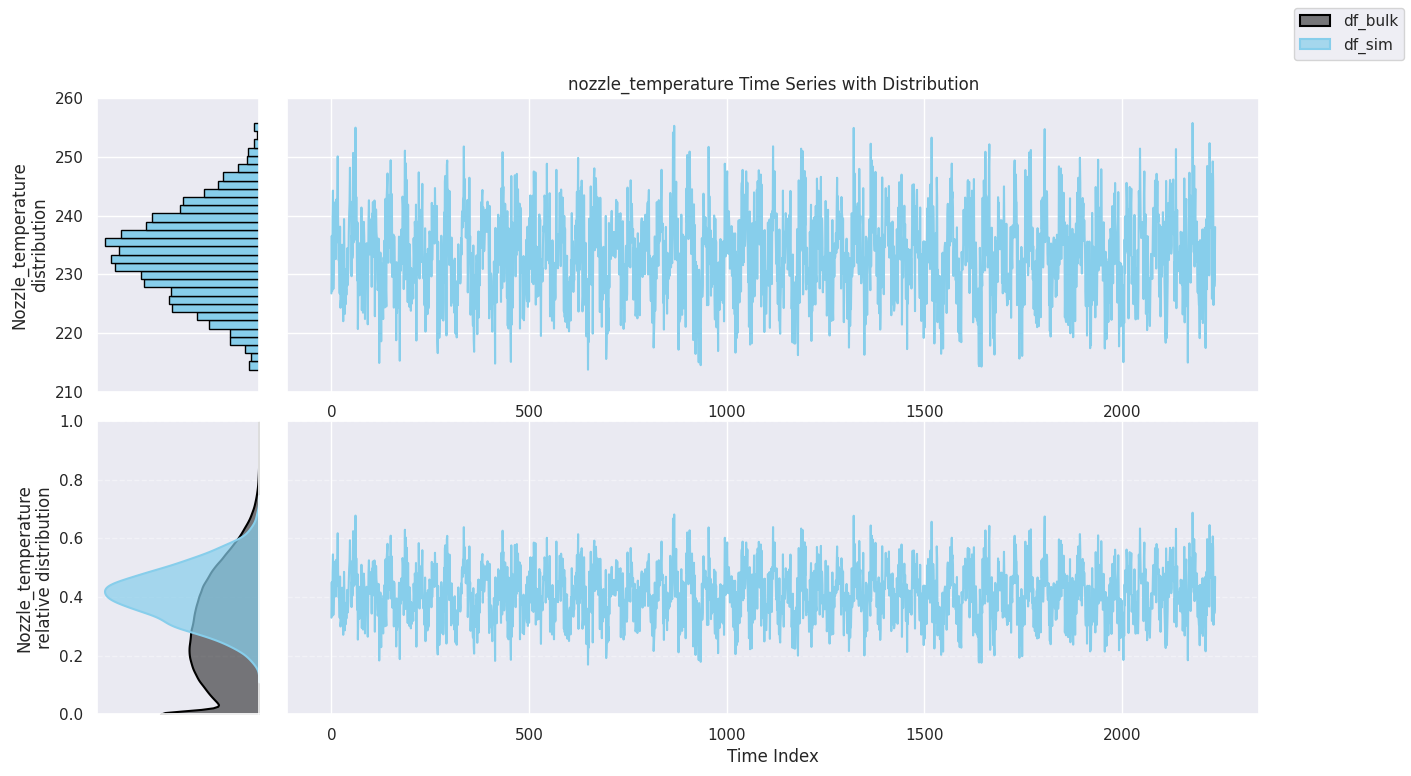

In [85]:
plot_timeseries_with_distribution(df_sim, df_bulk, 'nozzle_temperature')

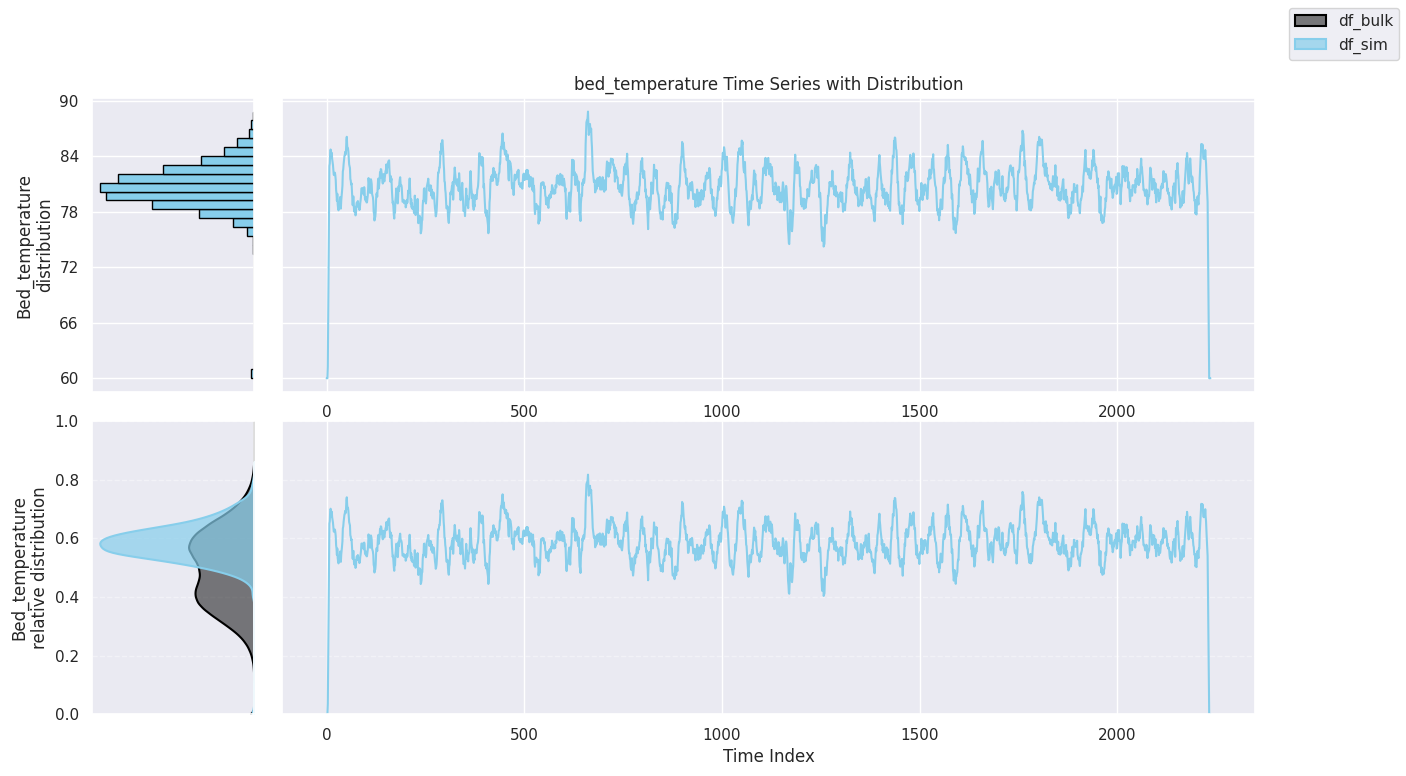

In [86]:
plot_timeseries_with_distribution(df_sim, df_bulk, 'bed_temperature')

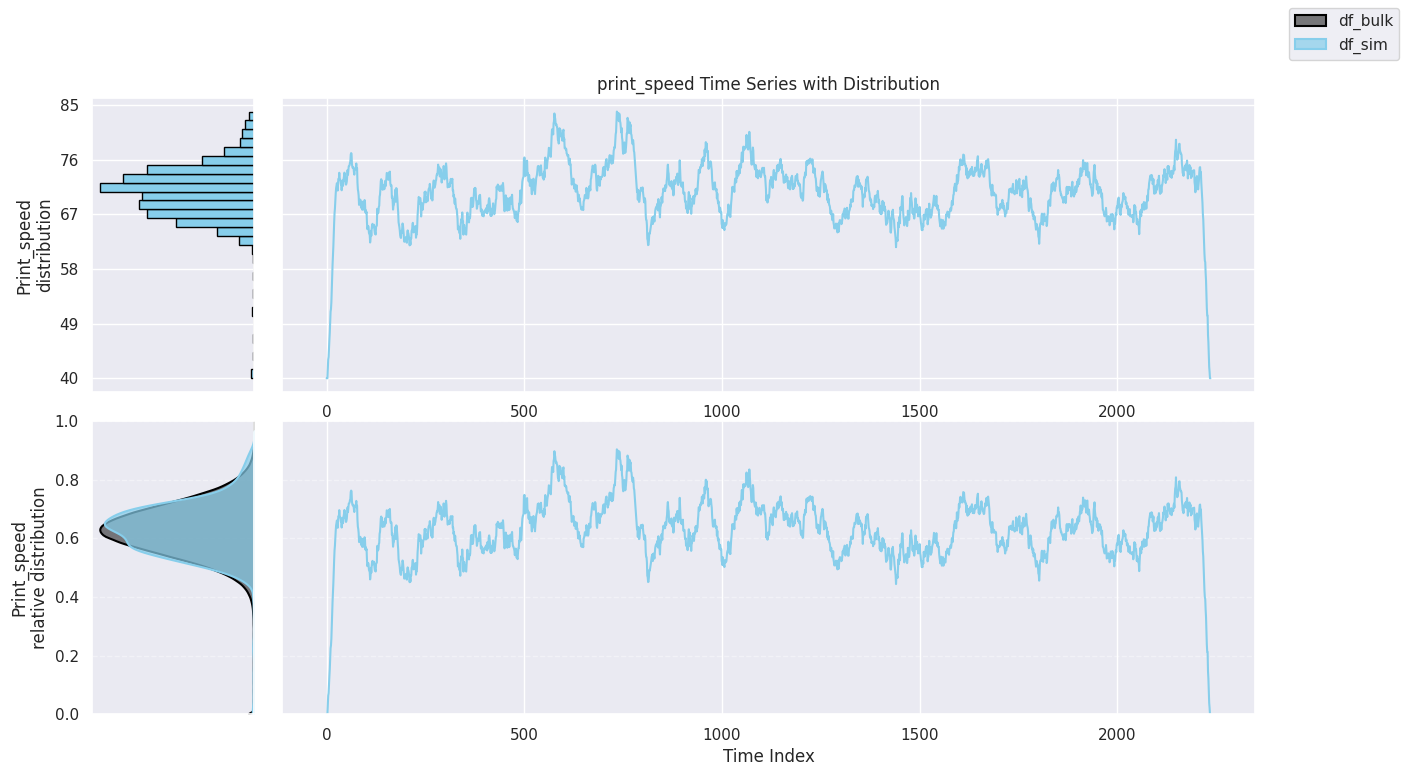

In [87]:
plot_timeseries_with_distribution(df_sim, df_bulk, 'print_speed')

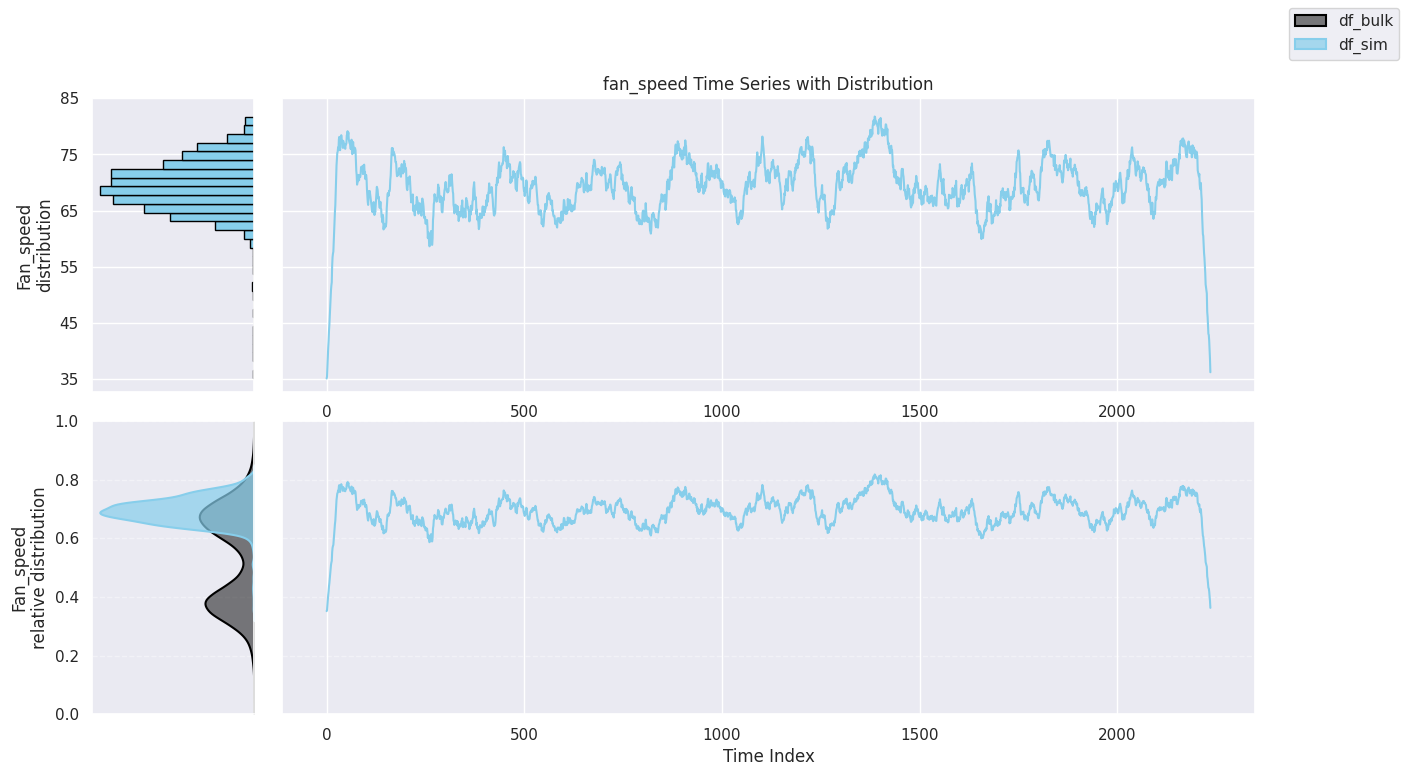

In [88]:
plot_timeseries_with_distribution(df_sim, df_bulk, 'fan_speed')

# 07 - Anomaly detection
Generate hardcoded values for anomaly detection service.

In [34]:
quantiles = df_bulk.groupby(['material', 'infill_pattern'])['nozzle_temperature'].quantile(0.999)
quantiles

material  infill_pattern
abs       grid              267.368355
          honeycomb         264.614420
pla       grid              237.685206
          honeycomb         237.932900
Name: nozzle_temperature, dtype: float64

In [35]:
quantile_dict = {}

for (material, infill_pattern), value in quantiles.items():
    if material not in quantile_dict:
        quantile_dict[material] = {}
    quantile_dict[material][infill_pattern] = round(value, 2)  # or leave as float
quantile_dict

{'abs': {'grid': 267.37, 'honeycomb': 264.61},
 'pla': {'grid': 237.69, 'honeycomb': 237.93}}

In [27]:
df_bulk["TEMP_DIFF"] = df_bulk["nozzle_temperature"] - df_bulk["bed_temperature"]
df_bulk.describe()

layer_height  wall_thickness  infill_density  nozzle_temperature  \
count  1.327034e+06    1.327034e+06    1.327034e+06        1.327034e+06   
mean   9.707668e-02    5.672084e+00    5.523166e+01        2.229249e+02   
std    6.220566e-02    2.982900e+00    2.680002e+01        1.473448e+01   
min    2.000000e-02    1.000000e+00    1.000000e+01        2.000000e+02   
25%    4.000000e-02    3.000000e+00    4.000000e+01        2.110435e+02   
50%    1.000000e-01    6.000000e+00    5.000000e+01        2.223339e+02   
75%    1.500000e-01    8.000000e+00    8.000000e+01        2.340276e+02   
max    2.000000e-01    1.200000e+01    1.000000e+02        2.825738e+02   

        print_speed  bed_temperature     fan_speed     TEMP_DIFF  
count  1.327034e+06     1.327034e+06  1.327034e+06  1.327034e+06  
mean   7.037002e+01     7.744216e+01  5.361682e+01  1.454828e+02  
std    4.866057e+00     4.631554e+00  1.670809e+01  1.143226e+01  
min    4.000000e+01     6.000000e+01  5.682425e-01  1.130716e+02  
25%    6.777971e+01     7.390540e+01  3.784367e+01  1.364658e+02  
50%    7.060050e+01     7.764883e+01  5.761001e+01  1.448088e+02  
75%    7.339065e+01     8.095893e+01  6.781265e+01  1.535679e+02  
max    9.138138e+01     9.411739e+01  1.000000e+02  2.041995e+02